<a href="https://colab.research.google.com/github/GabrielaFuller/Aether/blob/main/Copy_of_Copy_of_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Proposal

From "Netflix and Chill" to "Netflix and SPILL": Market Volatility of Streaming Stocks Using Machine Learning — GARCH, ARIMA, Random Forest, and XGBoost in Predictive Modeling



# Introduction

Streaming stocks are some of those most volatile on the market, simply because they are susceptible to viewer taste, market share, and entertainment variety that is now available.

Stock volatility refers to the stock's price fluctuation over a period of time. A stock price changing rapidly in a short period of time is indicative of high volatility. Alternatively, a stock price remaining steady is considered low volatility.

Stock volatility is measured by the standard deviation, a measure of how far the returns are from the mean. Investors will be especially interested in the volatility of stocks, especially when looking to balance portfolios for high-risk versus low-risk.

# Data

Data will be sourced from Alpaca API using the following stock:

Netflix
Roku
Spotify

I will be using 10 years worth of data from 1/1/2015-2025. My test set will be the last 2 years of 2023-2025. This will require using SMOTE to compensate for the stock post-COVID.  

These 3 were chosen since these encompass 3 different market types. Additionally, Roku also produces streaming devices along with streaming services. Netflix streams movies and TV, and is now streaming gaming services. Spotify mainly streams music, audiobooks, and podcasts.

While Disney+, Amazon Prime, and Apple TV were considered, it would be difficult to seperate the streaming stock from the conglomerates.



# Methodology

Using GARCH, ARIMA, Random Forest, and XGBoost, these are the machine learning methods chosen for predicting the stock market volatility.

# GARCH
GARCH is ideal for modeling time-varying volatility. It will directly model the volatility and not the price, and accounts for the volatility clustering. This is common in financial data. Big movements follow big movements. This is used in price forecasting. This method is built on past squared past squared residuals and past forecasted variance on estimated future variance. It's often used in finance models.

# ARIMA

From Investopedia: https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp

Autoregression (AR): refers to a model that shows a changing variable that regresses on its own lagged, or prior, values.

Integrated (I): represents the differencing of raw observations to allow the time series to become stationary (i.e., data values are replaced by the difference between the data values and the previous values).

Moving average (MA):  incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations.

This model was chosen since it uses both trend and seasonality in time series. It's effective in forecasting price levels using past values.

Autoregressive integrated moving average (ARIMA) models predict future values based on past values.

It only works with stationary time series and doesn't really work well with nonlinear relationships.

# Random Forest

Since this dataset is nonlinear and feature-rich, I chose random forest as an additional method to analyze the data. This method is also robust against overfitting and can handle a large number of variables like sentiment and macroeconomic data.

Random forest is generated by an ensemble of decision trees built from random subsets of data and features. The averaging of the outputs of the individual trees are predicted from the results. This method treats rows as independent and is not time-aware.

# XGBoost

The data pulled from Alphavantage is tabular, mainly numeric and date-based. This method will also handle real-time systems.

XGBoost builds trees sequentially to correct the errors of previous ones, optimizing a loss function using gradient descent. It will require manual feature engineering, but this was already anticipated.  

In [1]:
import requests
import pandas as pd
import json

API_KEY = '7H58D0LVU1LNGWPH'
TICKERS = ['XLC','SMH','QQQ','SPY','VXZ','USD','ROKU','NFLX','SPOT']
START_DATE = '2015-01-01'
END_DATE = '2025-01-01'

def fetch_stock_data(symbol):
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={API_KEY}'
    response = requests.get(url)
    data = response.json()

    if "Time Series (Daily)" not in data:
        print(f"Error fetching data for {symbol}: {data.get('Note') or data.get('Error Message')}")
        return None

    df = pd.DataFrame.from_dict(data['Time Series (Daily)'], orient='index')
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df = df.loc[START_DATE:END_DATE]
    df = df.astype(float)
    df=df[['close']]
    return df


features_data = {}

for ticker in TICKERS:
    df = fetch_stock_data(ticker)
    if df is not None:
        features_data[ticker] = df
        print(f"\n{ticker} — {df.shape[0]} rows from {df.index.min().date()} to {df.index.max().date()}")
        display(df)



XLC — 1645 rows from 2018-06-19 to 2024-12-31


,close
2018-06-19,49.96
2018-06-20,50.58
2018-06-21,50.27
2018-06-22,50.49
2018-06-25,49.45
...,...
2024-12-24,99.17
2024-12-26,99.04
2024-12-27,98.16
2024-12-30,97.13



SMH — 2516 rows from 2015-01-02 to 2024-12-31


,close
2015-01-02,54.49
2015-01-05,53.52
2015-01-06,52.26
2015-01-07,52.94
2015-01-08,54.26
...,...
2024-12-24,251.37
2024-12-26,250.93
2024-12-27,248.40
2024-12-30,244.66



QQQ — 2516 rows from 2015-01-02 to 2024-12-31


,close
2015-01-02,102.94
2015-01-05,101.43
2015-01-06,100.07
2015-01-07,101.36
2015-01-08,103.30
...,...
2024-12-24,529.96
2024-12-26,529.60
2024-12-27,522.56
2024-12-30,515.61



SPY — 2516 rows from 2015-01-02 to 2024-12-31


,close
2015-01-02,205.43
2015-01-05,201.72
2015-01-06,199.82
2015-01-07,202.31
2015-01-08,205.90
...,...
2024-12-24,601.30
2024-12-26,601.34
2024-12-27,595.01
2024-12-30,588.22



VXZ — 1750 rows from 2018-01-18 to 2024-12-31


,close
2018-01-18,16.9000
2018-01-19,16.9000
2018-01-22,16.7200
2018-01-23,16.9500
2018-01-24,16.9500
...,...
2024-12-24,48.5300
2024-12-26,48.8800
2024-12-27,49.8700
2024-12-30,50.5600



USD — 2516 rows from 2015-01-02 to 2024-12-31


,close
2015-01-02,94.4600
2015-01-05,91.4900
2015-01-06,87.2700
2015-01-07,88.8400
2015-01-08,94.3445
...,...
2024-12-24,70.6300
2024-12-26,70.9400
2024-12-27,68.7400
2024-12-30,67.4300



ROKU — 1826 rows from 2017-09-28 to 2024-12-31


,close
2017-09-28,23.50
2017-09-29,26.54
2017-10-02,23.56
2017-10-03,20.81
2017-10-04,20.85
...,...
2024-12-24,79.56
2024-12-26,79.48
2024-12-27,77.03
2024-12-30,74.89



NFLX — 2516 rows from 2015-01-02 to 2024-12-31


,close
2015-01-02,348.940
2015-01-05,331.180
2015-01-06,325.510
2015-01-07,327.200
2015-01-08,334.455
...,...
2024-12-24,932.120
2024-12-26,924.140
2024-12-27,907.550
2024-12-30,900.430



SPOT — 1699 rows from 2018-04-03 to 2024-12-31


,close
2018-04-03,149.01
2018-04-04,144.22
2018-04-05,143.99
2018-04-06,147.92
2018-04-09,150.00
...,...
2024-12-24,461.64
2024-12-26,457.98
2024-12-27,456.48
2024-12-30,451.79


In [2]:
import requests
import pandas as pd
import numpy as np

API_KEY = '7H58D0LVU1LNGWPH'
TICKERS = ['NFLX', 'ROKU', 'SPOT','XLC','SMH','QQQ','SPY','USD']
START_DATE = '2015-01-01'
END_DATE = '2025-01-01'

stock_data = {}

for ticker in TICKERS:
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={ticker}&outputsize=full&apikey={API_KEY}'
    response = requests.get(url)
    data = response.json()

    if 'Time Series (Daily)' not in data:
        print(f"Failed to fetch data for {ticker}")
        continue

    ts_data = data['Time Series (Daily)']
    df = pd.DataFrame.from_dict(ts_data, orient='index')
    df.columns = ['open', 'high', 'low', 'close', 'volume']
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()
    df = df.loc[START_DATE:END_DATE]
    df = df.astype(float)
    df=df[['close']]
    df=df.rename(columns={'close':ticker+'close'})
    stock_data[ticker] = df
    print(f"{ticker}: {df.shape[0]} rows from {df.index.min().date()} to {df.index.max().date()}")

from IPython.display import display
display(stock_data['NFLX'].head())
display(stock_data['ROKU'].head())
display(stock_data['SPOT'].head())


#display(stock_data['ROKU'])
#display(stock_data['SPOT'])
stock_data['NFLX']=pd.concat([stock_data['NFLX'],stock_data['ROKU'],stock_data['SPOT'],stock_data['XLC'],stock_data['SMH'],stock_data['QQQ'],stock_data['SPY'],stock_data['USD'],],axis=1, join='inner')

stock_data['NFLX']['NFLXVolatility']=stock_data['NFLX']['NFLXclose'].rolling(window=40).std() * np.sqrt(252)
stock_data['NFLX']=stock_data['NFLX'].dropna()
stock_data['NFLX'].loc[:,stock_data['NFLX'].columns != 'NFLXVolatility']=stock_data['NFLX'].loc[:,stock_data['NFLX'].columns != 'NFLXVolatility'].pct_change(40)
stock_data['NFLX']['NFLXVolatility']=stock_data['NFLX']['NFLXVolatility'].shift(-40)
stock_data['NFLX']=stock_data['NFLX'].dropna()
#stock_data['NFLX']['40DayPctChge']=stock_data['NFLX']['close'].pct_change(40)

#stock_data['NFLX']['Roku40DayPctChge'] = stock_data['NFLX']['close'].pct_change() * 100
#stock_data['ROKU']
#stock_data['SPOT']
display(stock_data['NFLX'])

NFLX: 2516 rows from 2015-01-02 to 2024-12-31
ROKU: 1826 rows from 2017-09-28 to 2024-12-31
SPOT: 1699 rows from 2018-04-03 to 2024-12-31
XLC: 1645 rows from 2018-06-19 to 2024-12-31
SMH: 2516 rows from 2015-01-02 to 2024-12-31
QQQ: 2516 rows from 2015-01-02 to 2024-12-31
SPY: 2516 rows from 2015-01-02 to 2024-12-31
USD: 2516 rows from 2015-01-02 to 2024-12-31


,NFLXclose
2015-01-02,348.940
2015-01-05,331.180
2015-01-06,325.510
2015-01-07,327.200
2015-01-08,334.455


,ROKUclose
2017-09-28,23.50
2017-09-29,26.54
2017-10-02,23.56
2017-10-03,20.81
2017-10-04,20.85


,SPOTclose
2018-04-03,149.01
2018-04-04,144.22
2018-04-05,143.99
2018-04-06,147.92
2018-04-09,150.00


,NFLXclose,ROKUclose,SPOTclose,XLCclose,SMHclose,QQQclose,SPYclose,USDclose,NFLXVolatility
2018-10-10,-0.034371,0.011830,-0.228490,-0.076690,-0.087204,-0.053568,-0.019725,-0.155041,426.108710
2018-10-11,-0.016238,0.028802,-0.199968,-0.071633,-0.080000,-0.053730,-0.034105,-0.158065,430.048456
2018-10-12,0.053095,0.058896,-0.176076,-0.050573,-0.060334,-0.030586,-0.028550,-0.122008,426.089851
2018-10-15,0.051613,0.100232,-0.154589,-0.049784,-0.063697,-0.042533,-0.037396,-0.122711,420.081706
2018-10-16,0.056968,0.116255,-0.116148,-0.026289,-0.030675,-0.013801,-0.018448,-0.060678,402.877775
...,...,...,...,...,...,...,...,...,...
2024-10-28,0.068111,0.122178,0.120975,0.047068,0.031833,0.040166,0.030425,0.159922,964.627155
2024-10-29,0.124563,0.171573,0.190596,0.076645,0.140903,0.083043,0.053778,0.436051,939.483453
2024-10-30,0.108963,0.219670,0.196720,0.088384,0.115869,0.077658,0.052745,0.391772,898.805704
2024-10-31,0.105921,-0.039280,0.171835,0.075736,0.077678,0.049475,0.034625,0.267506,852.165690


,NFLXclose,ROKUclose,SPOTclose,XLCclose,SMHclose,QQQclose,SPYclose,USDclose,NFLXVolatility
2018-10-10,-0.034371,0.011830,-0.228490,-0.076690,-0.087204,-0.053568,-0.019725,-0.155041,426.108710
2018-10-11,-0.016238,0.028802,-0.199968,-0.071633,-0.080000,-0.053730,-0.034105,-0.158065,430.048456
2018-10-12,0.053095,0.058896,-0.176076,-0.050573,-0.060334,-0.030586,-0.028550,-0.122008,426.089851
2018-10-15,0.051613,0.100232,-0.154589,-0.049784,-0.063697,-0.042533,-0.037396,-0.122711,420.081706
2018-10-16,0.056968,0.116255,-0.116148,-0.026289,-0.030675,-0.013801,-0.018448,-0.060678,402.877775
...,...,...,...,...,...,...,...,...,...
2024-10-28,0.068111,0.122178,0.120975,0.047068,0.031833,0.040166,0.030425,0.159922,964.627155
2024-10-29,0.124563,0.171573,0.190596,0.076645,0.140903,0.083043,0.053778,0.436051,939.483453
2024-10-30,0.108963,0.219670,0.196720,0.088384,0.115869,0.077658,0.052745,0.391772,898.805704
2024-10-31,0.105921,-0.039280,0.171835,0.075736,0.077678,0.049475,0.034625,0.267506,852.165690


Pct Change Period is 5


<Figure size 640x480 with 0 Axes>

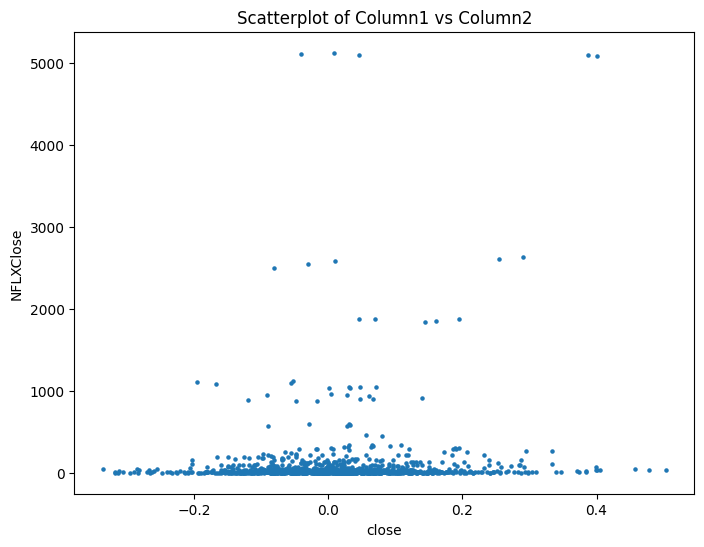

Correlation between NLFX and ROKU: 0.110959353414274

Pct Change Period is 10


<Figure size 640x480 with 0 Axes>

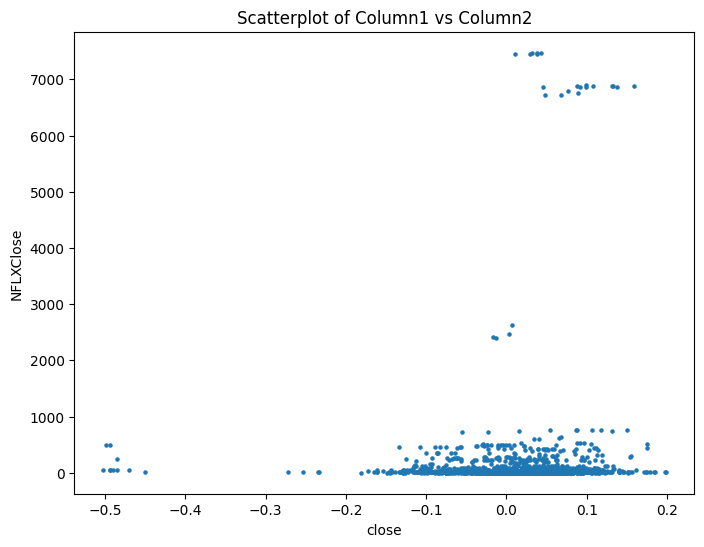

Correlation between NLFX and SMH: 0.10407170883008031

Pct Change Period is 10


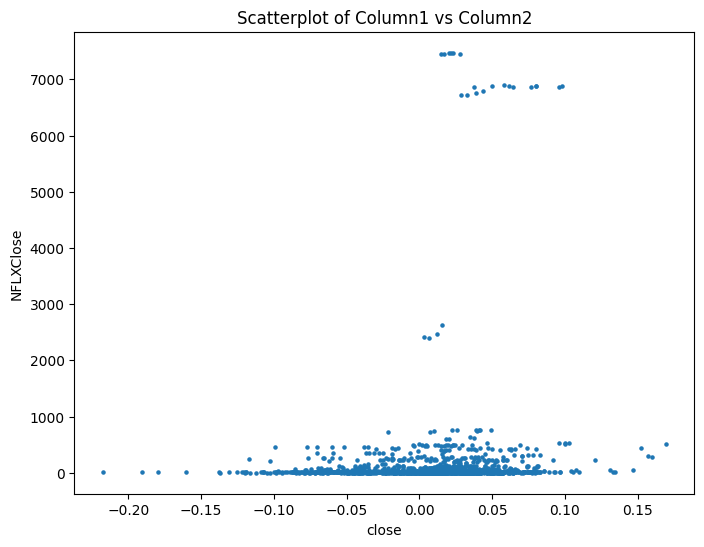

Correlation between NLFX and QQQ: 0.1211299692223713

Pct Change Period is 10


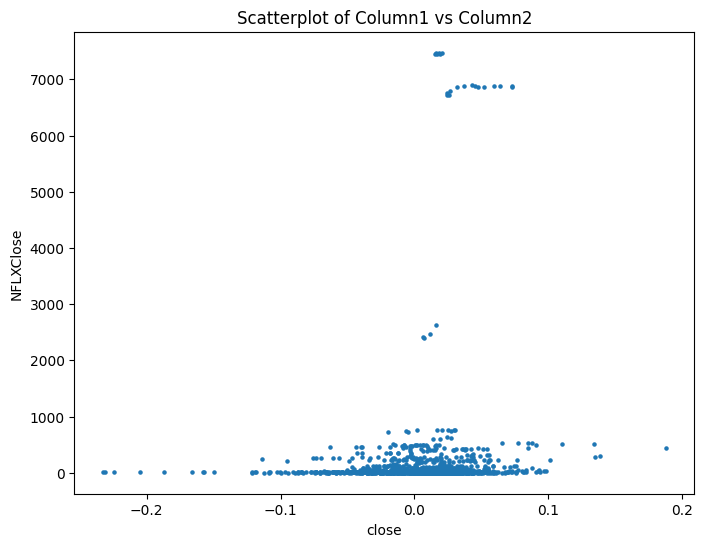

Correlation between NLFX and SPY: 0.11125889761891873

Pct Change Period is 10


<Figure size 640x480 with 0 Axes>

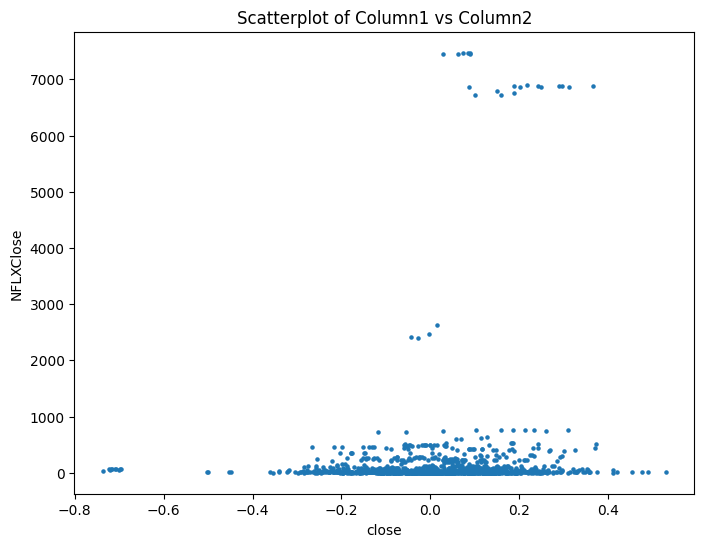

Correlation between NLFX and USD: 0.12212254856760937

Pct Change Period is 10


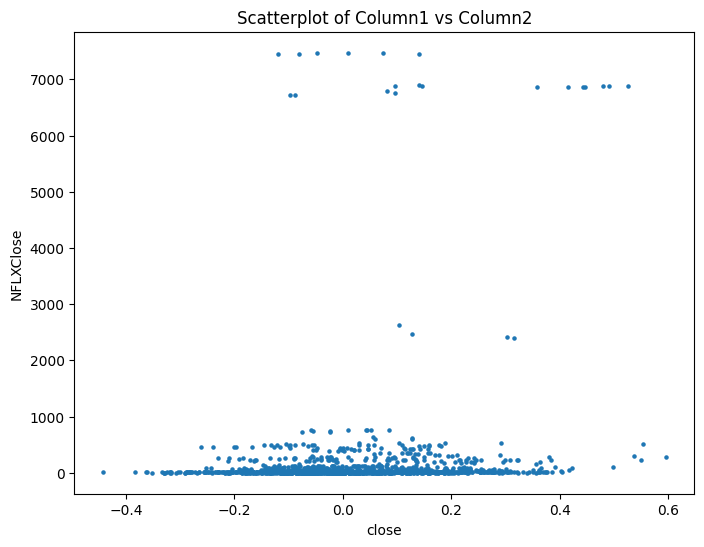

Correlation between NLFX and ROKU: 0.15187870011675197

Pct Change Period is 15


<Figure size 640x480 with 0 Axes>

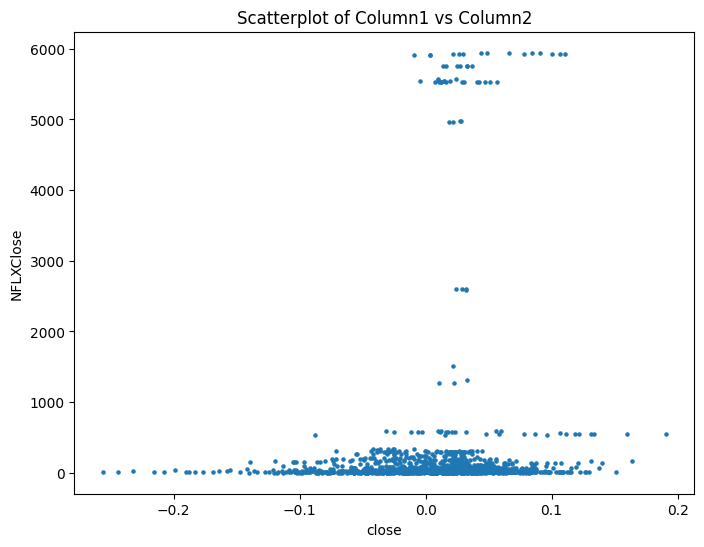

Correlation between NLFX and XLC: 0.10421152249221358

Pct Change Period is 15


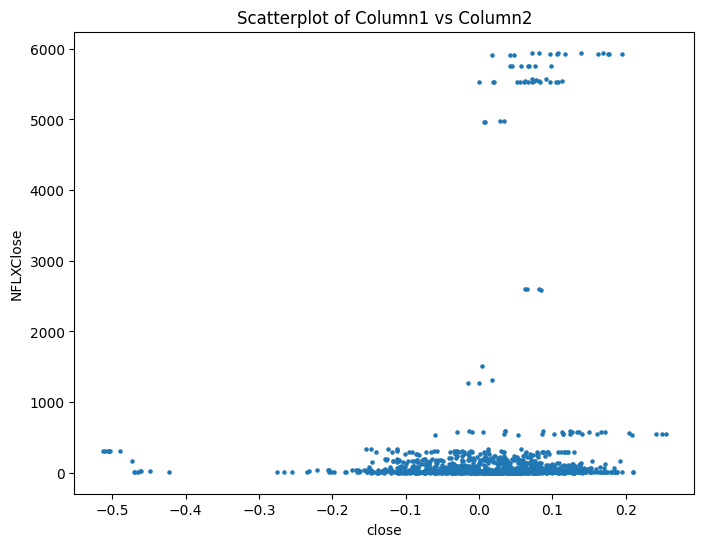

Correlation between NLFX and SMH: 0.13030486864350688

Pct Change Period is 15


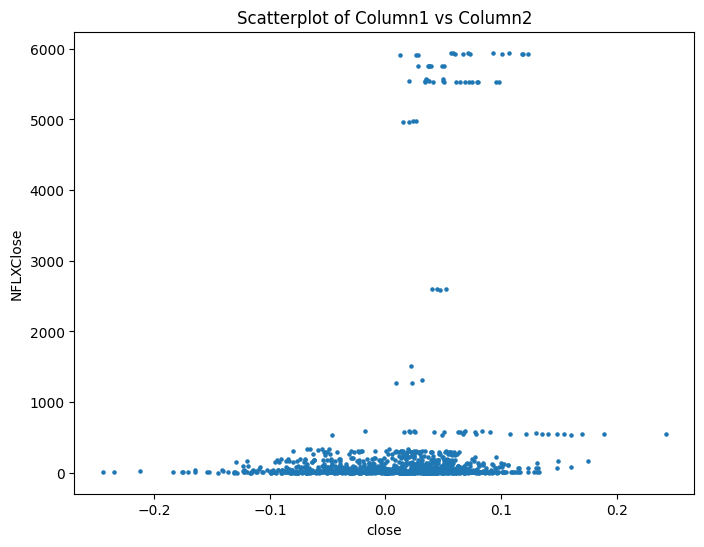

Correlation between NLFX and QQQ: 0.16665953526273533

Pct Change Period is 15


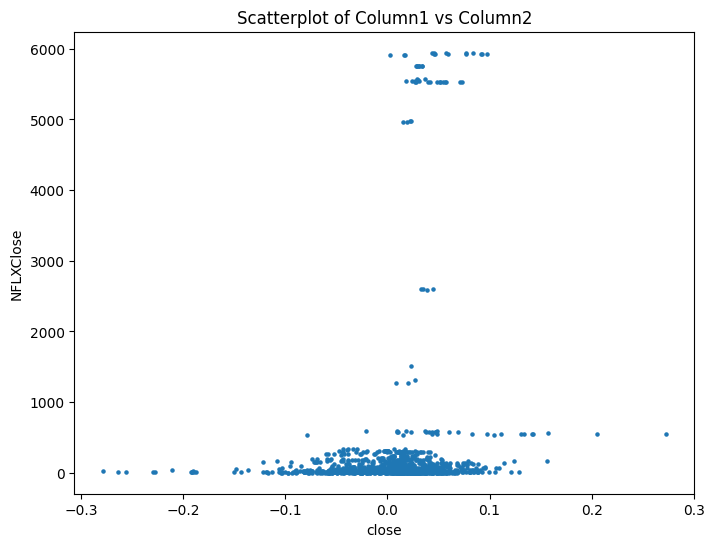

Correlation between NLFX and SPY: 0.1547012253846955

Pct Change Period is 15


<Figure size 640x480 with 0 Axes>

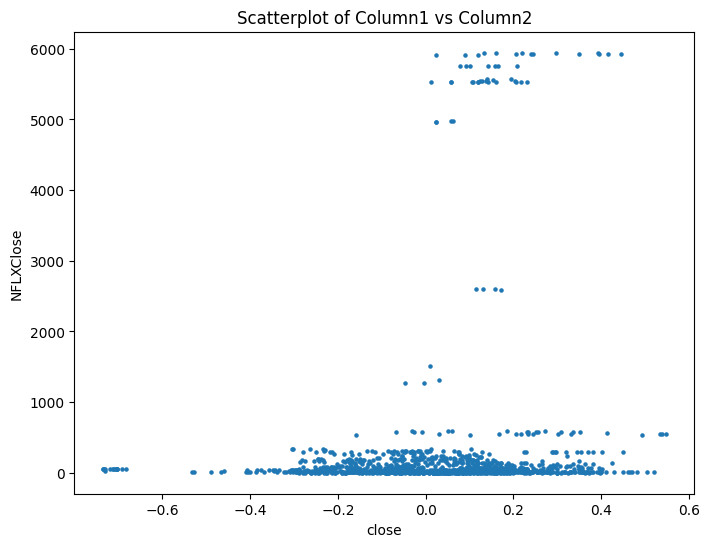

Correlation between NLFX and USD: 0.14295567397323802

Pct Change Period is 15


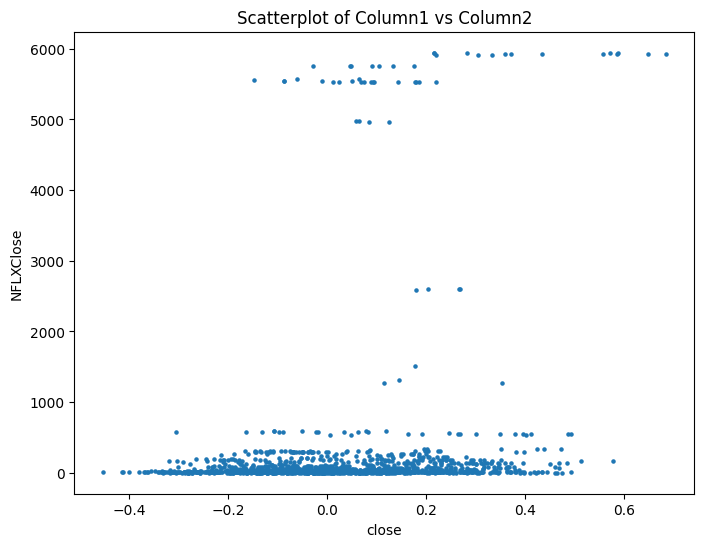

Correlation between NLFX and ROKU: 0.19839999477247275

Pct Change Period is 15


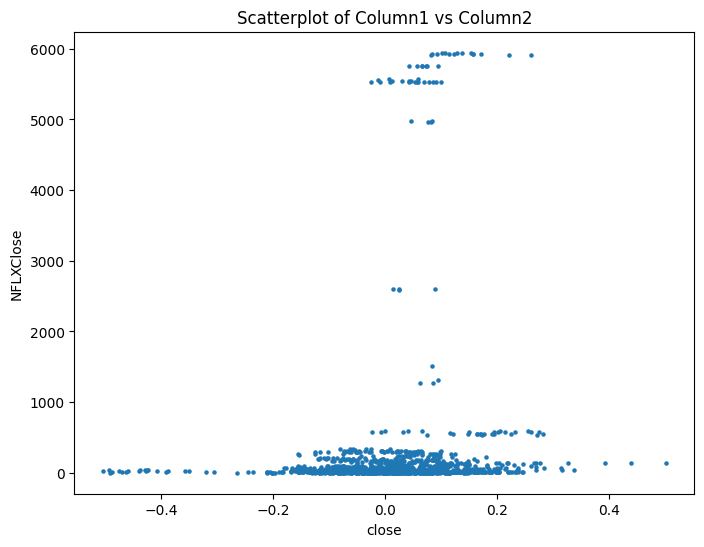

Correlation between NLFX and NFLX: 0.13743668820442137

Pct Change Period is 15


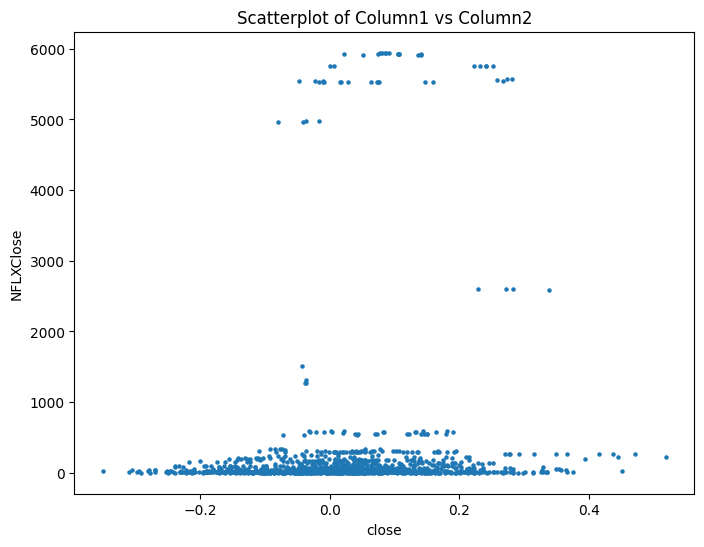

Correlation between NLFX and SPOT: 0.14026791744158365

Pct Change Period is 20


<Figure size 640x480 with 0 Axes>

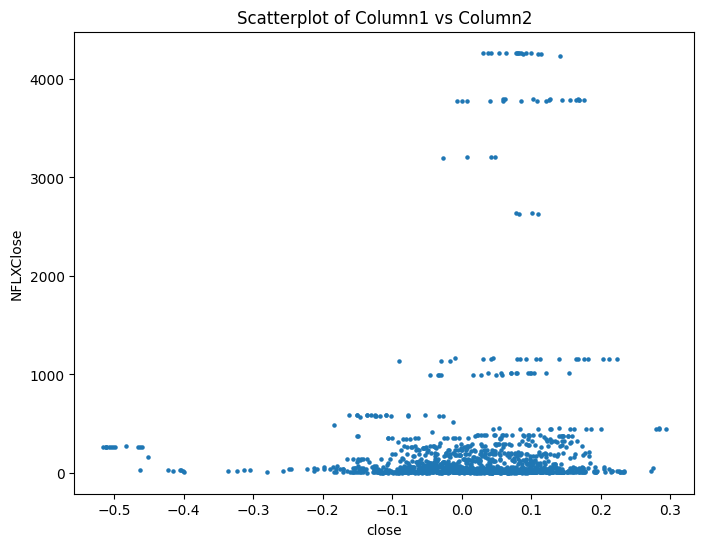

Correlation between NLFX and SMH: 0.12276580425186301

Pct Change Period is 20


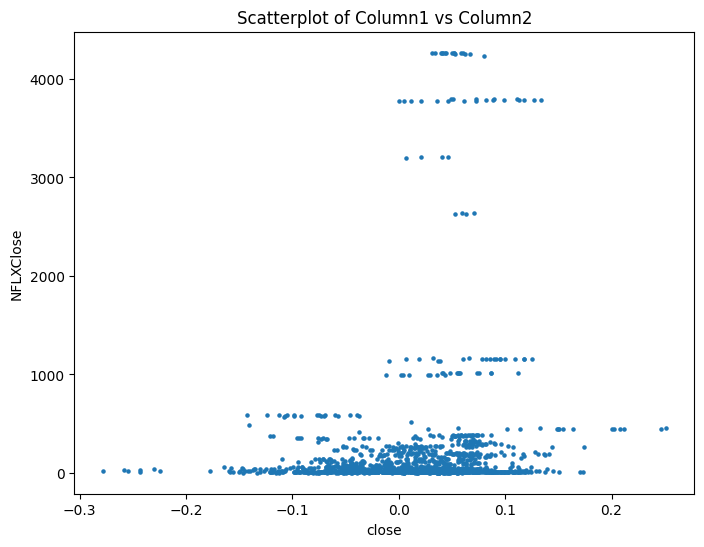

Correlation between NLFX and QQQ: 0.1538520284869928

Pct Change Period is 20


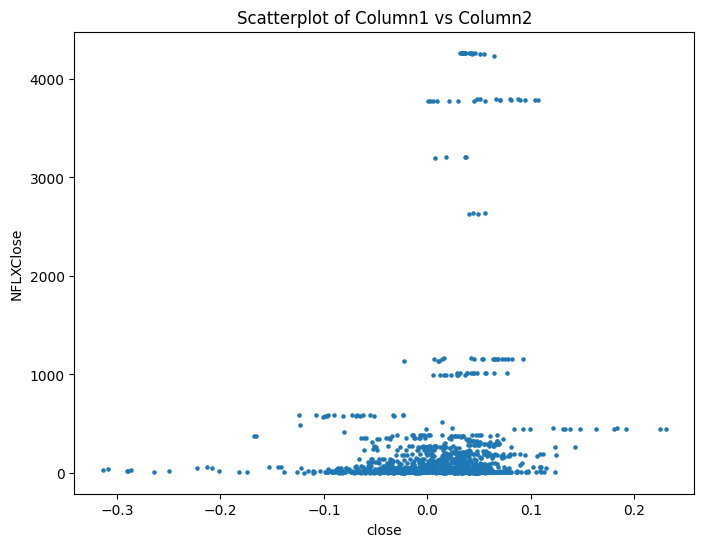

Correlation between NLFX and SPY: 0.1492782048237023

Pct Change Period is 20


<Figure size 640x480 with 0 Axes>

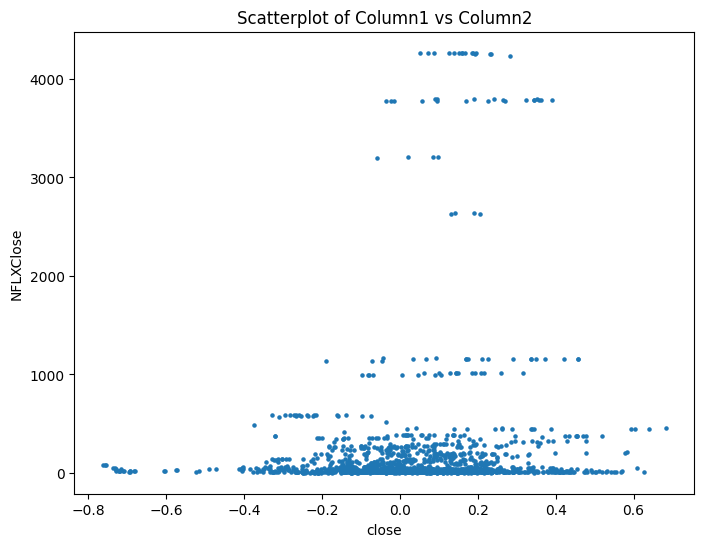

Correlation between NLFX and USD: 0.12956464444467575

Pct Change Period is 20


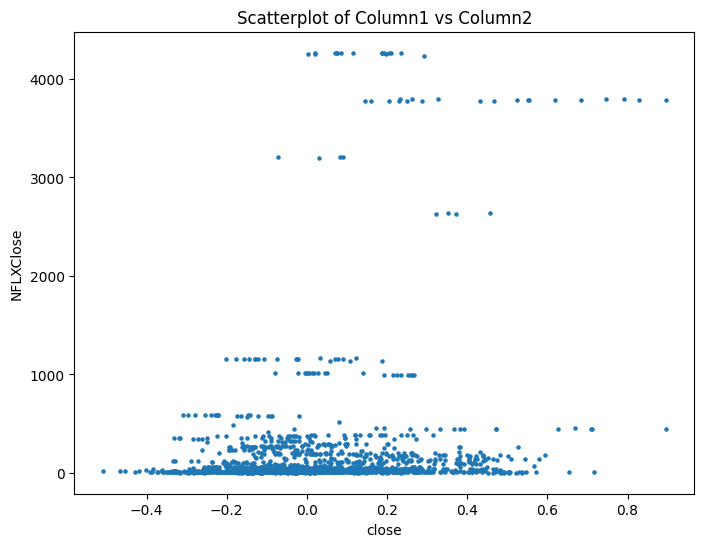

Correlation between NLFX and ROKU: 0.2245252097760737

Pct Change Period is 20


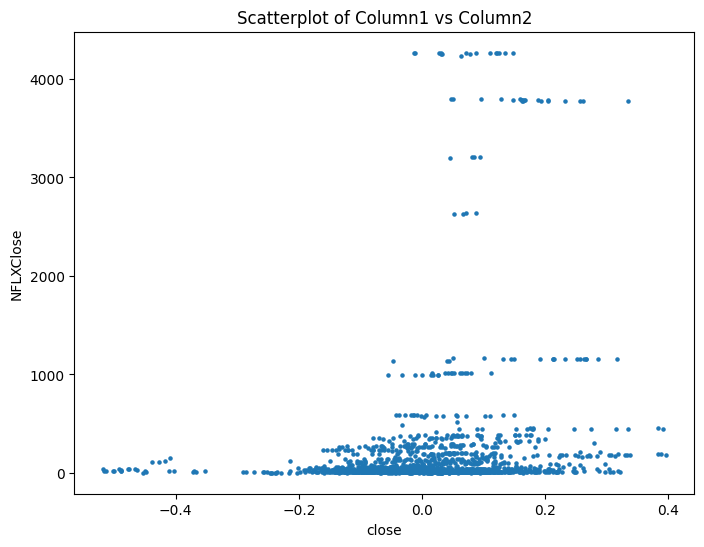

Correlation between NLFX and NFLX: 0.19832439210843386

Pct Change Period is 20


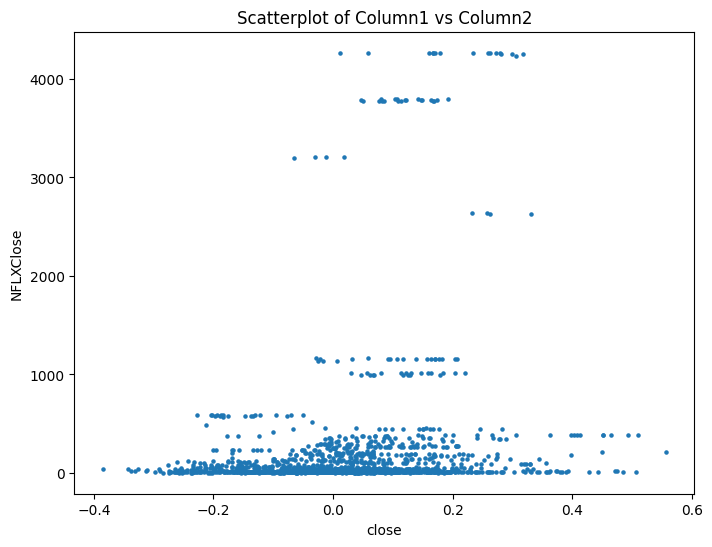

Correlation between NLFX and SPOT: 0.21208899613987314

Pct Change Period is 25


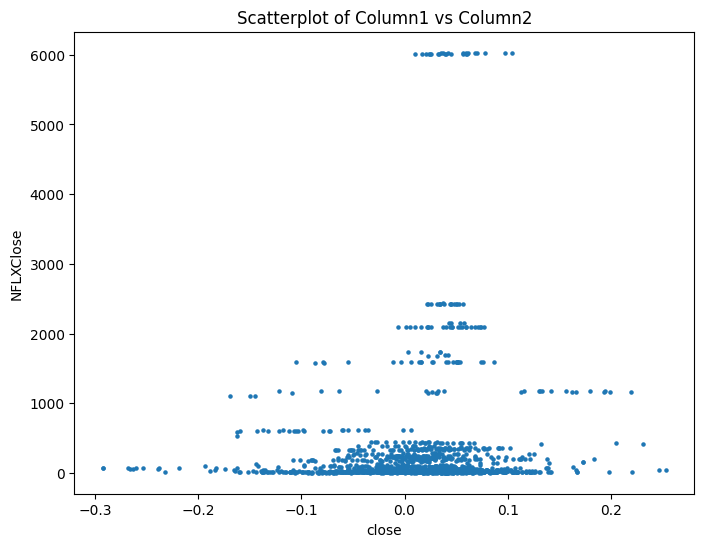

Correlation between NLFX and XLC: 0.10497113682432901

Pct Change Period is 25


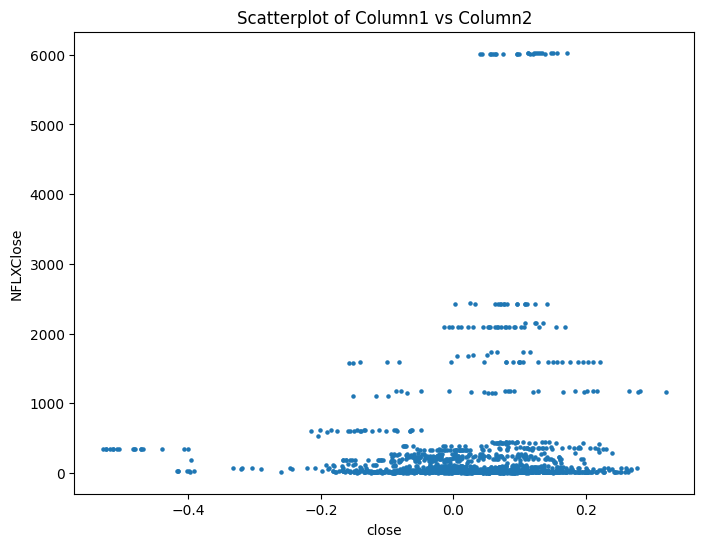

Correlation between NLFX and SMH: 0.12364797335309843

Pct Change Period is 25


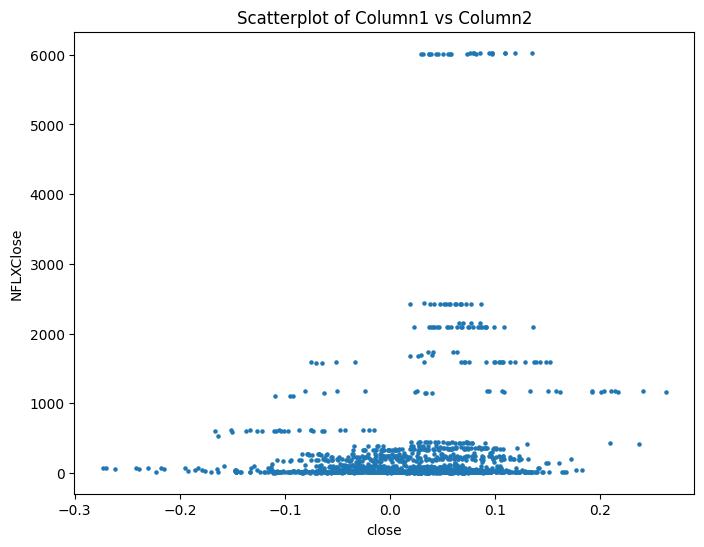

Correlation between NLFX and QQQ: 0.1806552869079211

Pct Change Period is 25


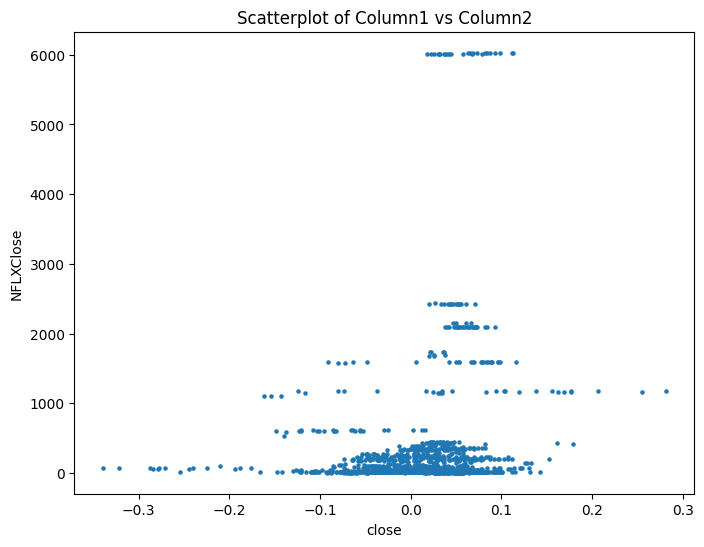

Correlation between NLFX and SPY: 0.1772787213193557

Pct Change Period is 25


<Figure size 640x480 with 0 Axes>

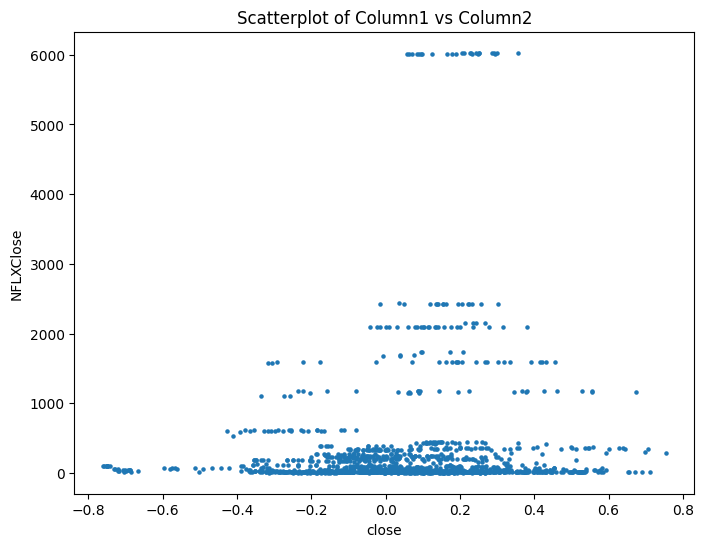

Correlation between NLFX and USD: 0.1162124449172919

Pct Change Period is 25


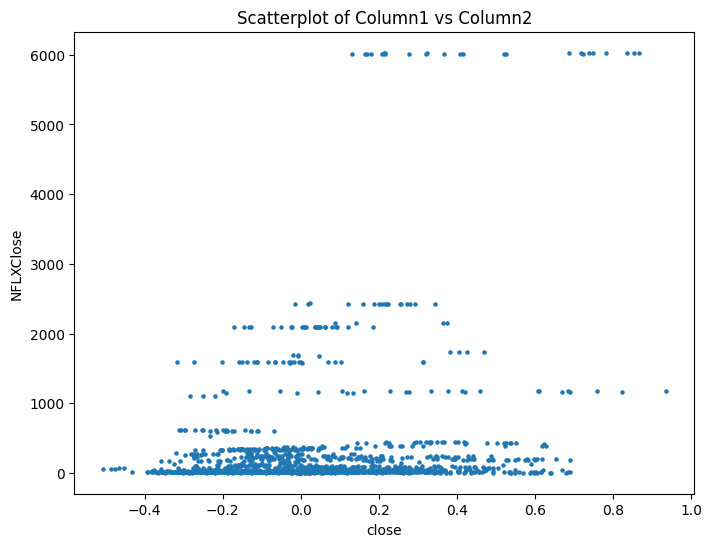

Correlation between NLFX and ROKU: 0.2596140762113977

Pct Change Period is 25


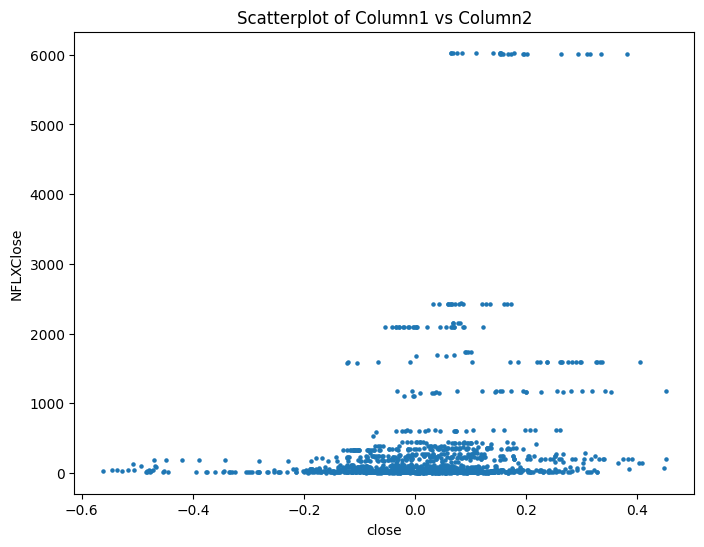

Correlation between NLFX and NFLX: 0.22560294926422975

Pct Change Period is 25


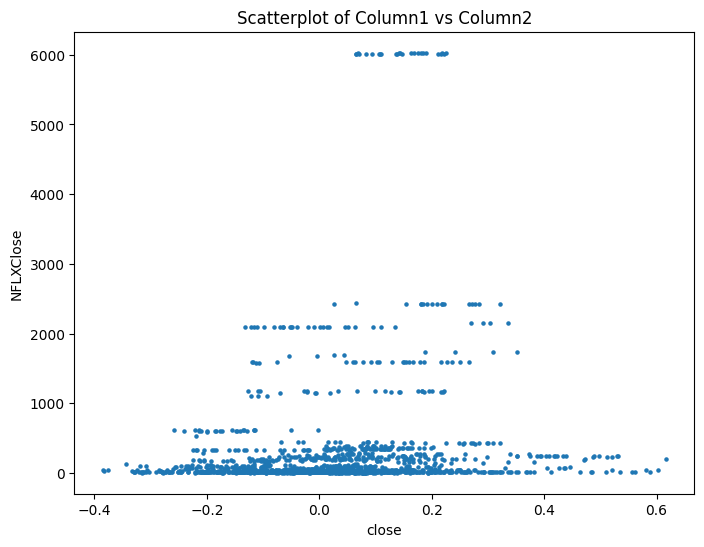

Correlation between NLFX and SPOT: 0.15839792250081272

Pct Change Period is 30


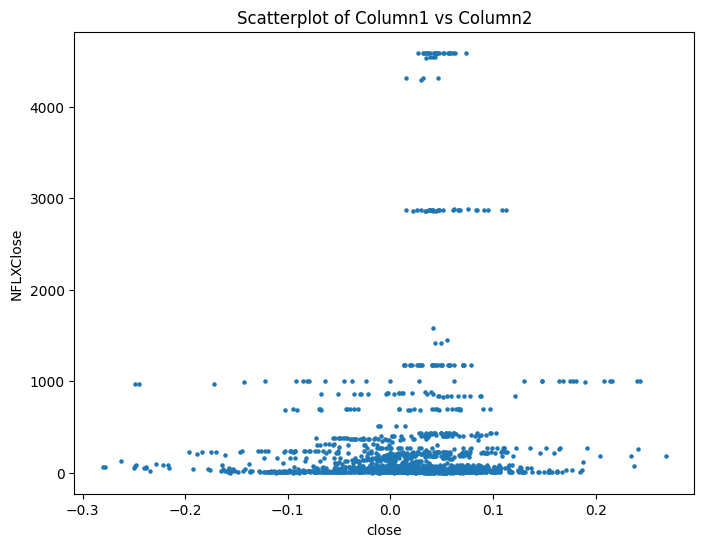

Correlation between NLFX and XLC: 0.1154117465535441

Pct Change Period is 30


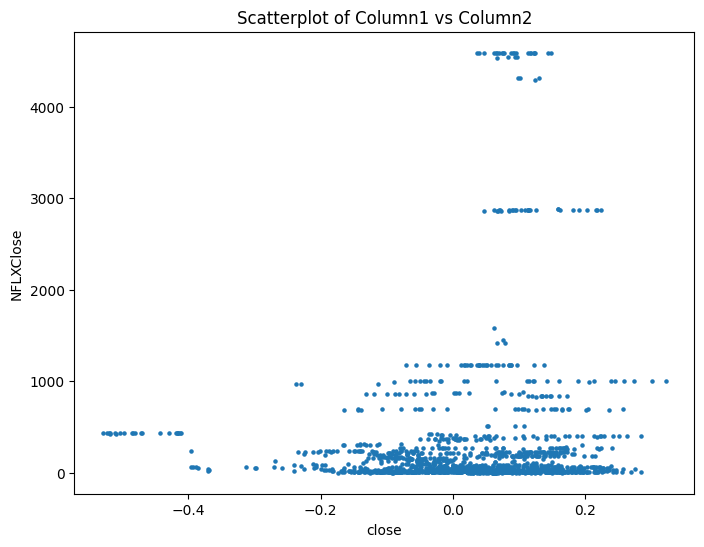

Correlation between NLFX and SMH: 0.11200022558822606

Pct Change Period is 30


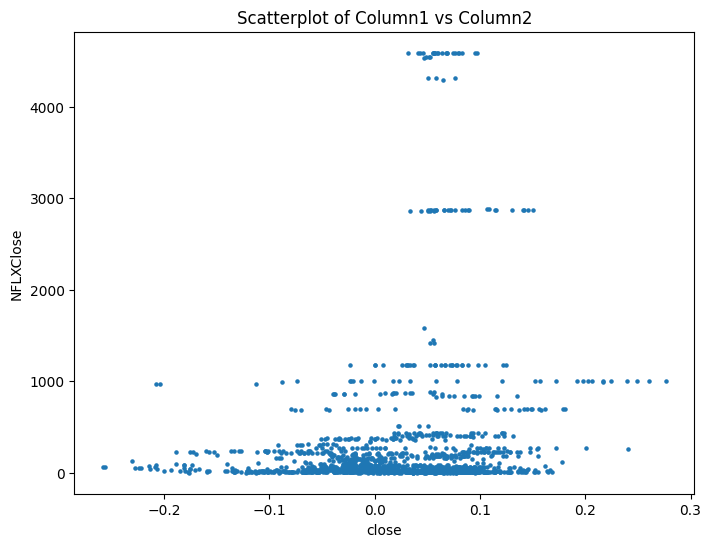

Correlation between NLFX and QQQ: 0.17405559525147044

Pct Change Period is 30


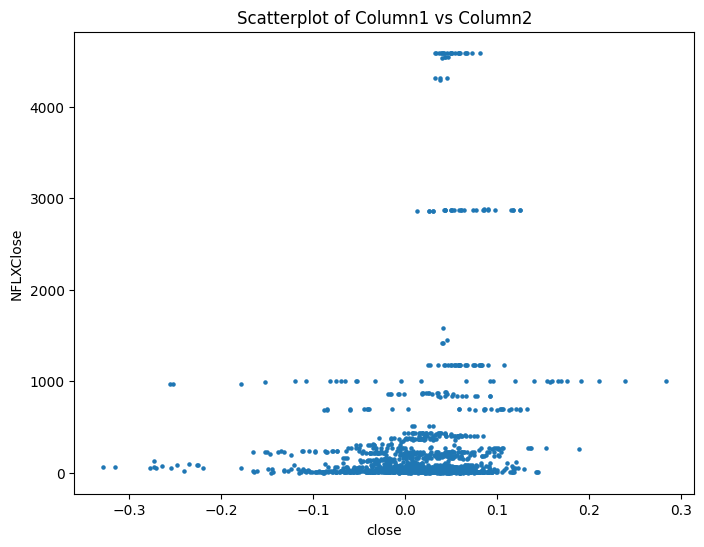

Correlation between NLFX and SPY: 0.1710377195594356

Pct Change Period is 30


<Figure size 640x480 with 0 Axes>

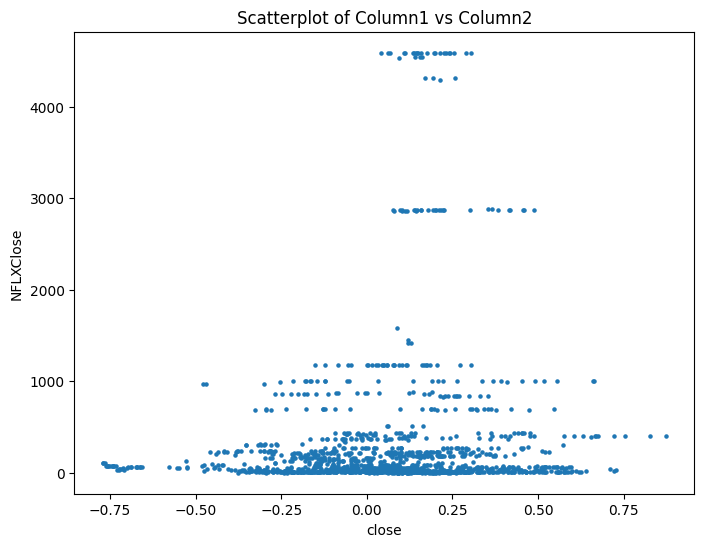

Correlation between NLFX and USD: 0.11229561544261268

Pct Change Period is 30


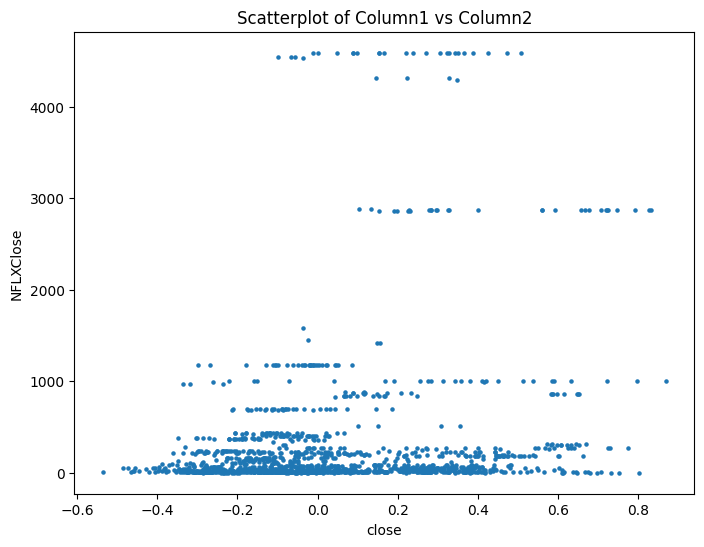

Correlation between NLFX and ROKU: 0.2233523527676225

Pct Change Period is 30


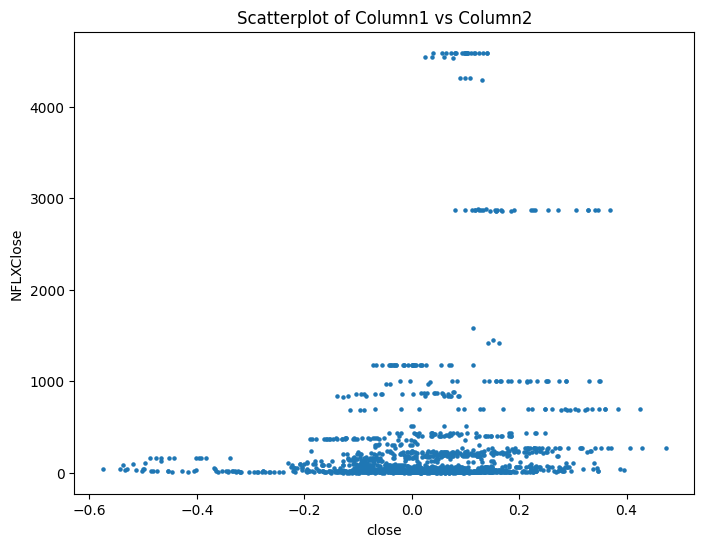

Correlation between NLFX and NFLX: 0.1880834160677639

Pct Change Period is 30


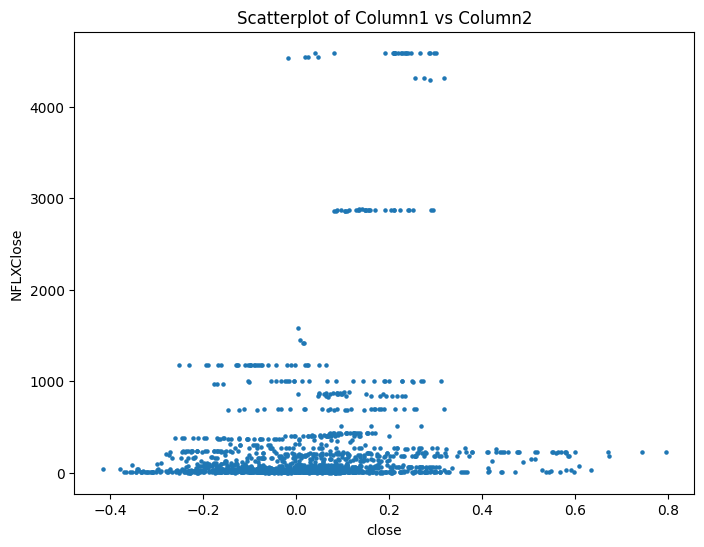

Correlation between NLFX and SPOT: 0.18984563333785856

Pct Change Period is 35


<Figure size 640x480 with 0 Axes>

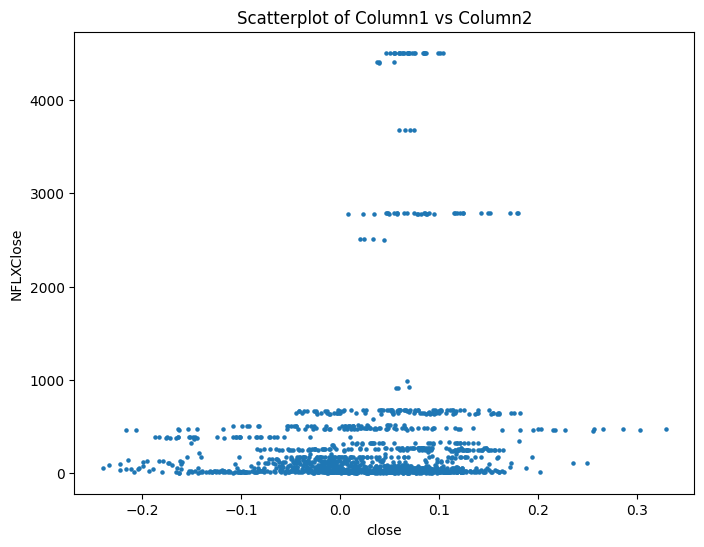

Correlation between NLFX and QQQ: 0.1500768020448312

Pct Change Period is 35


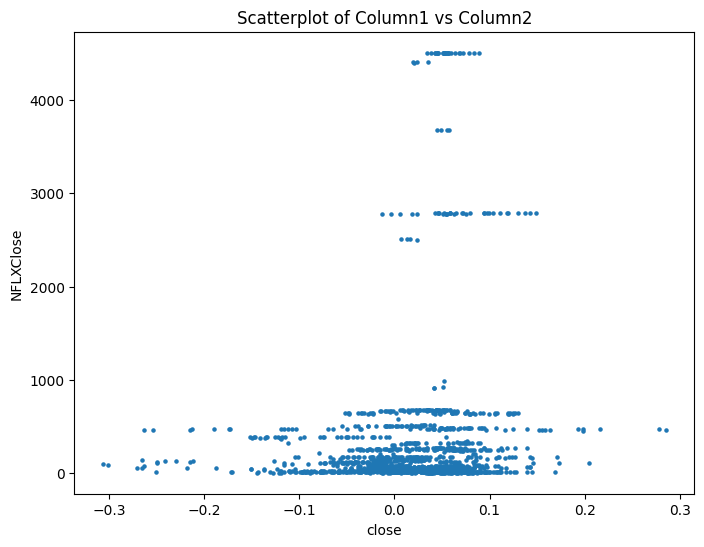

Correlation between NLFX and SPY: 0.14563440630839788

Pct Change Period is 35


<Figure size 640x480 with 0 Axes>

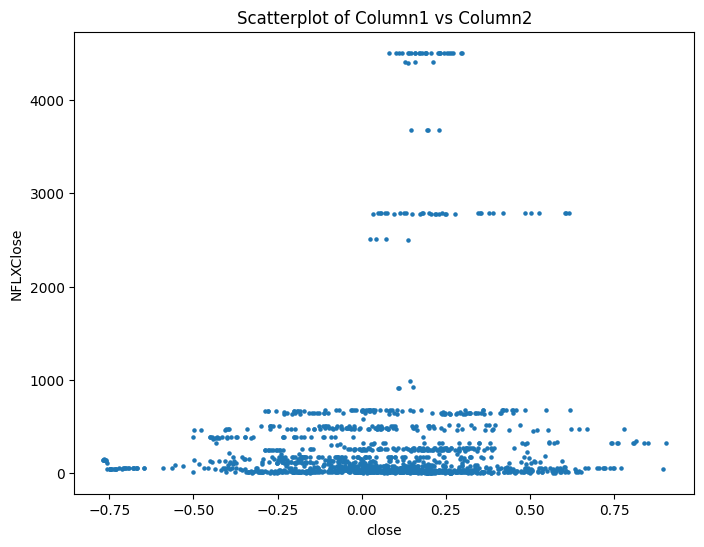

Correlation between NLFX and USD: 0.10970906251042488

Pct Change Period is 35


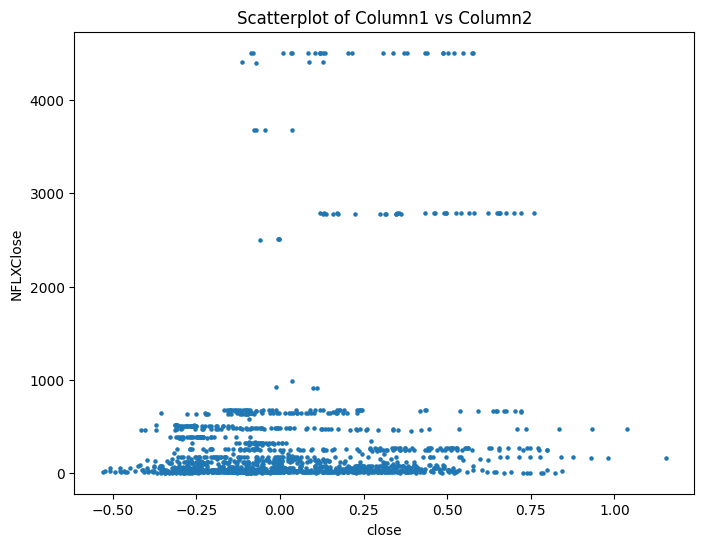

Correlation between NLFX and ROKU: 0.18689956794411688

Pct Change Period is 35


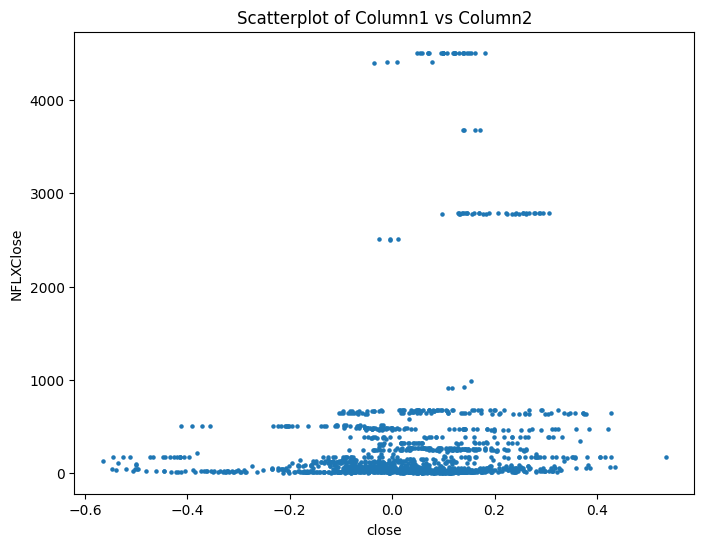

Correlation between NLFX and NFLX: 0.17747328093881803

Pct Change Period is 35


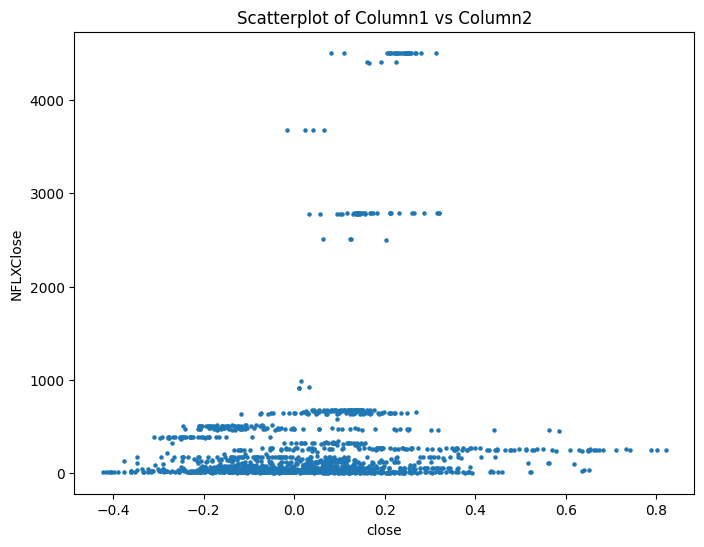

Correlation between NLFX and SPOT: 0.19226063137022661

Pct Change Period is 40


<Figure size 640x480 with 0 Axes>

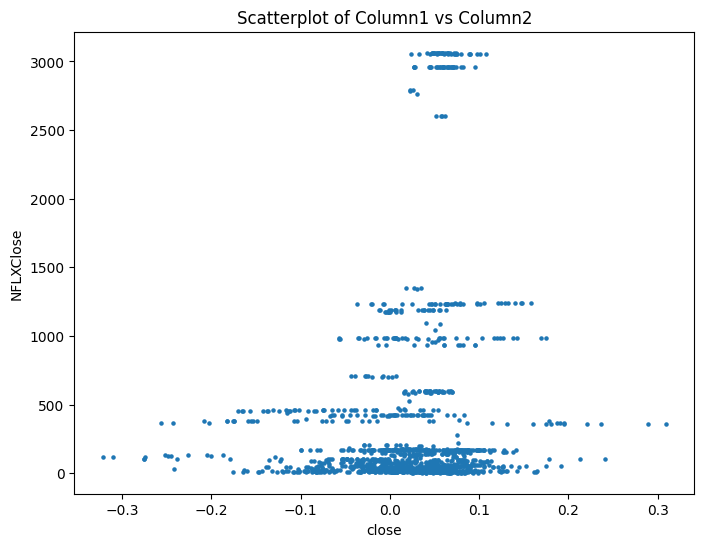

Correlation between NLFX and SPY: 0.14688471648732482

Pct Change Period is 40


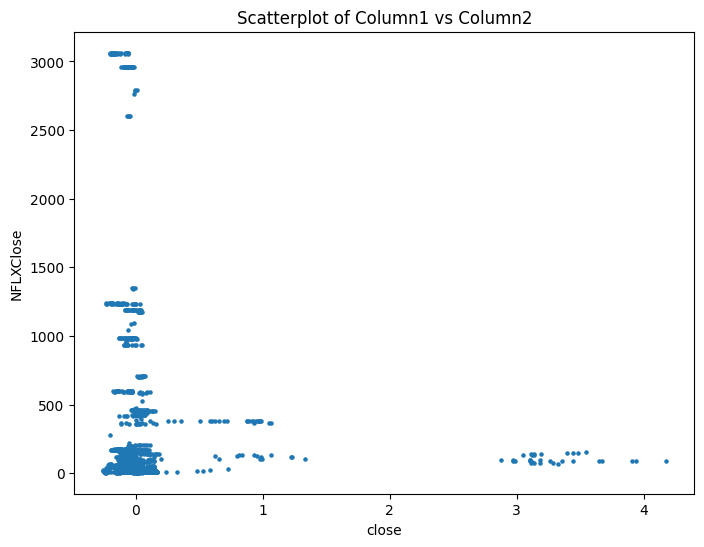

Correlation between NLFX and VXZ: -0.10042365686023125

Pct Change Period is 45


<Figure size 640x480 with 0 Axes>

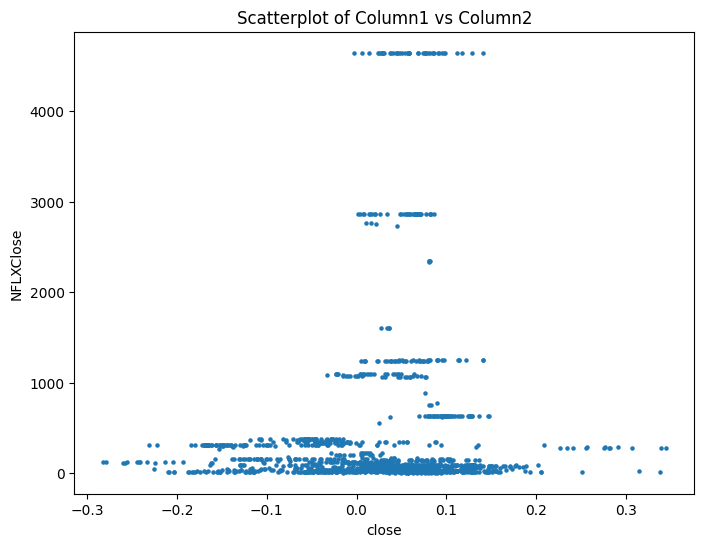

Correlation between NLFX and XLC: 0.10074628777141918

Pct Change Period is 45


<Figure size 640x480 with 0 Axes>

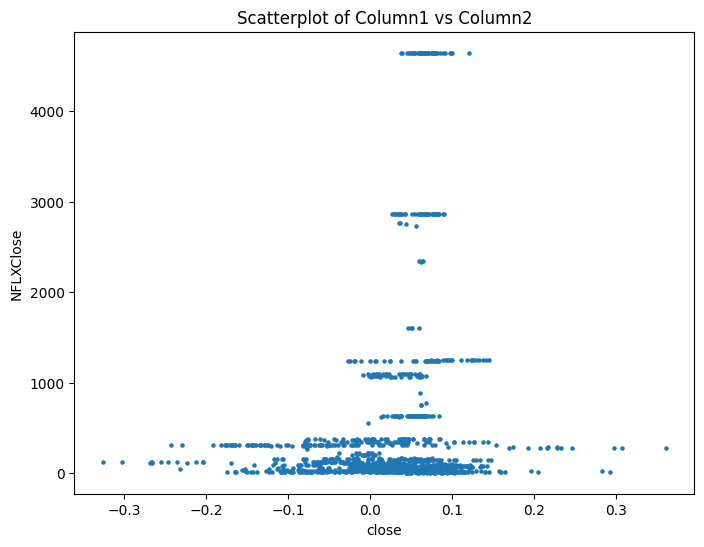

Correlation between NLFX and SPY: 0.15563957566081082

Pct Change Period is 45


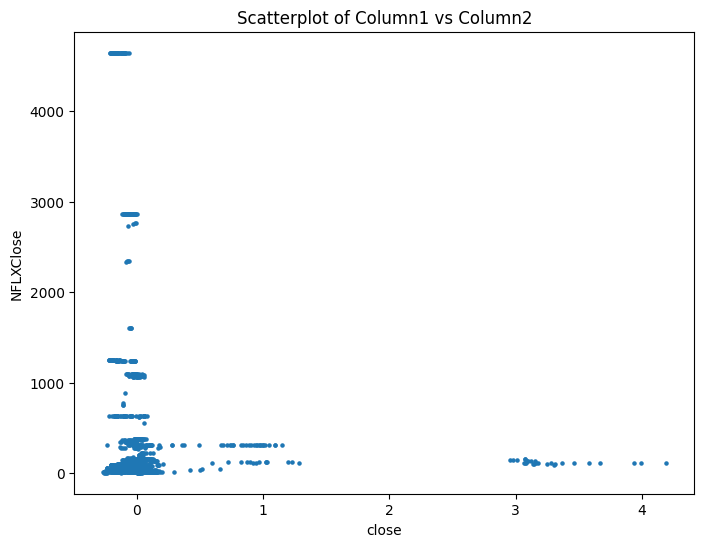

Correlation between NLFX and VXZ: -0.10319685162403151

Pct Change Period is 50


<Figure size 640x480 with 0 Axes>

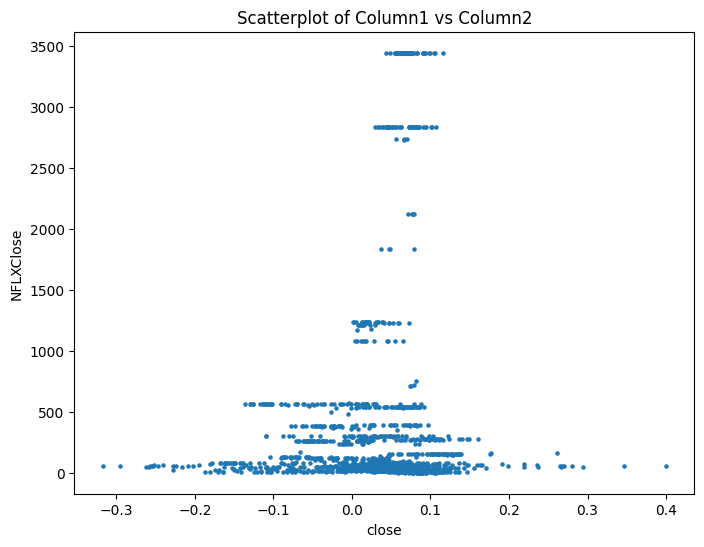

Correlation between NLFX and SPY: 0.12984573986457973

Pct Change Period is 50


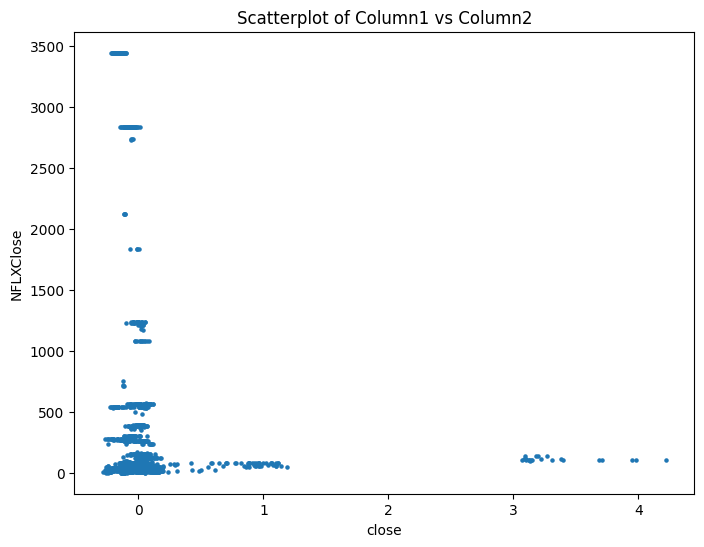

Correlation between NLFX and VXZ: -0.1109315181950558

Pct Change Period is 50


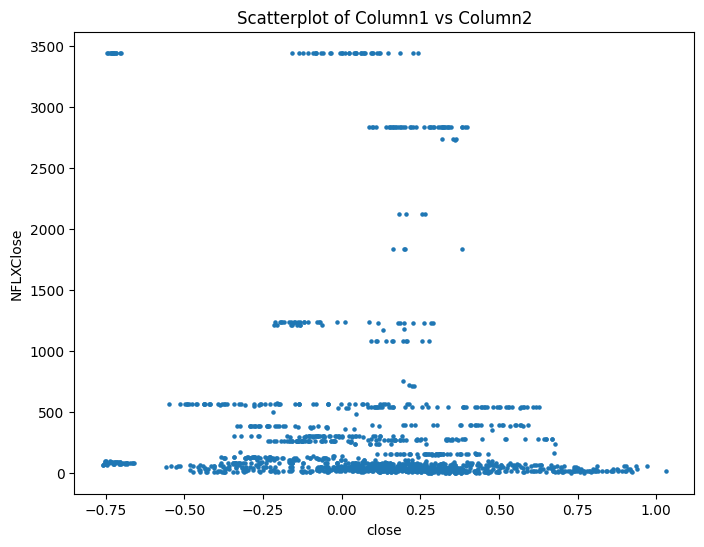

Correlation between NLFX and USD: -0.11463030007104984

Pct Change Period is 55


<Figure size 640x480 with 0 Axes>

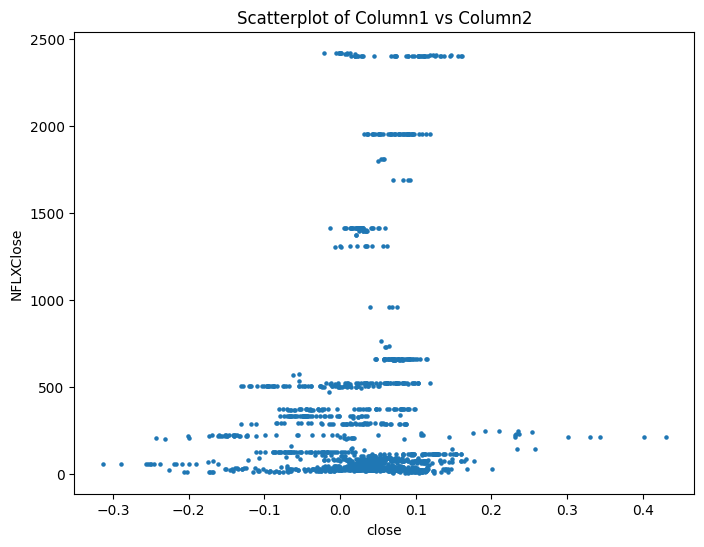

Correlation between NLFX and SPY: 0.12093988548097738

Pct Change Period is 55


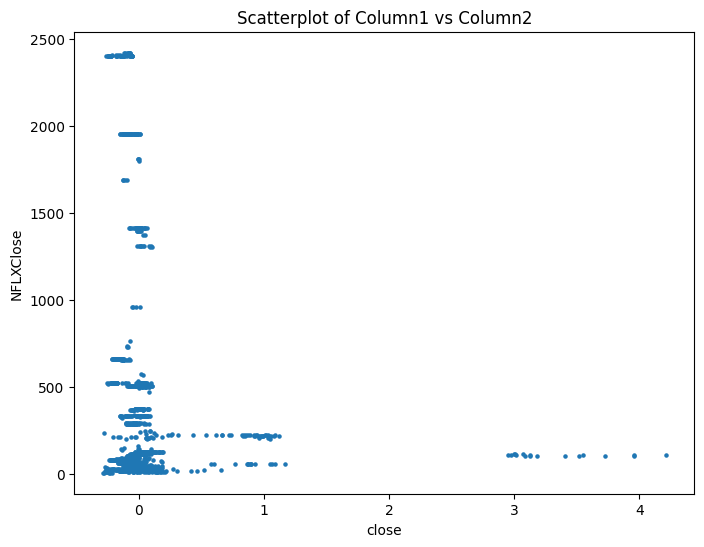

Correlation between NLFX and VXZ: -0.1152247374294833

Pct Change Period is 55


<Figure size 640x480 with 0 Axes>

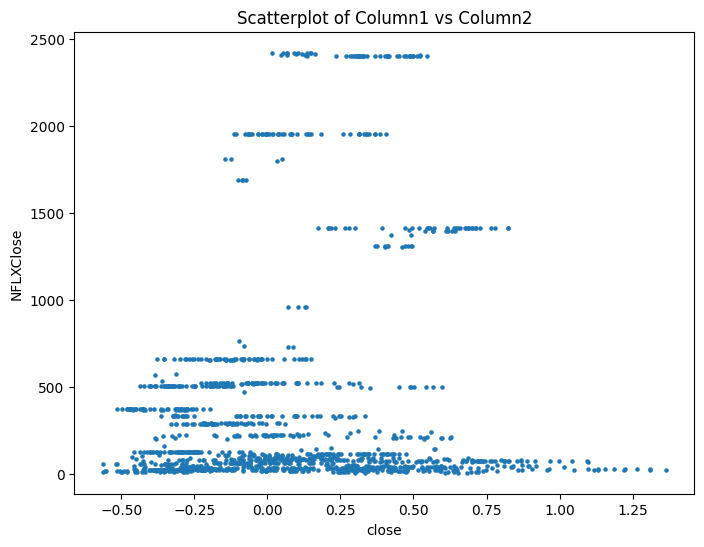

Correlation between NLFX and ROKU: 0.13295022029156467

Pct Change Period is 60


<Figure size 640x480 with 0 Axes>

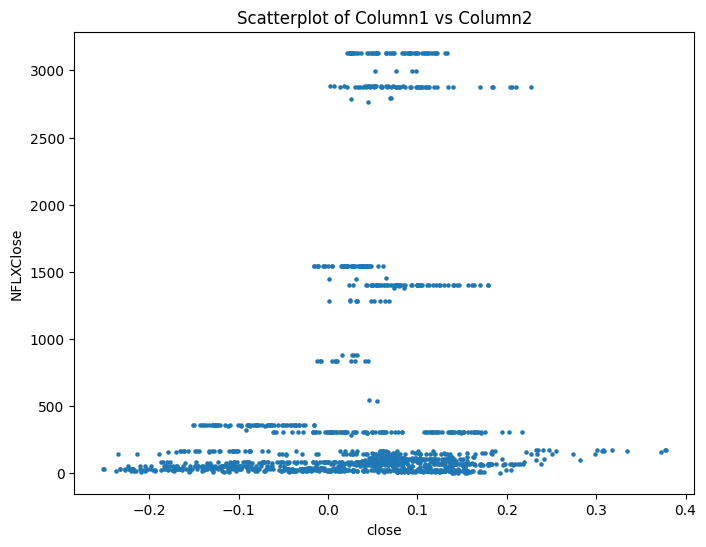

Correlation between NLFX and XLC: 0.1612364349933992

Pct Change Period is 60


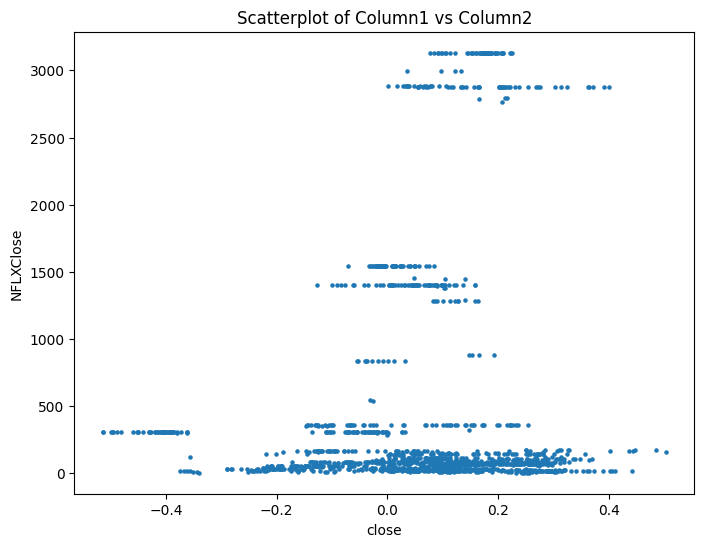

Correlation between NLFX and SMH: 0.12120211476689745

Pct Change Period is 60


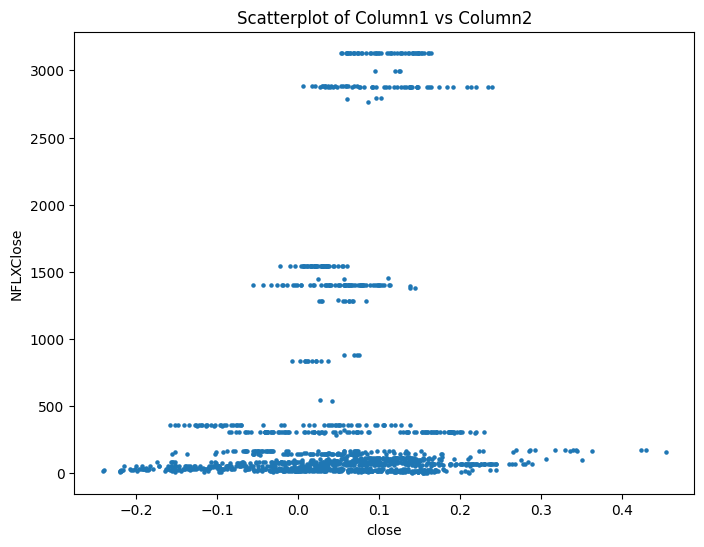

Correlation between NLFX and QQQ: 0.1440997193130765

Pct Change Period is 60


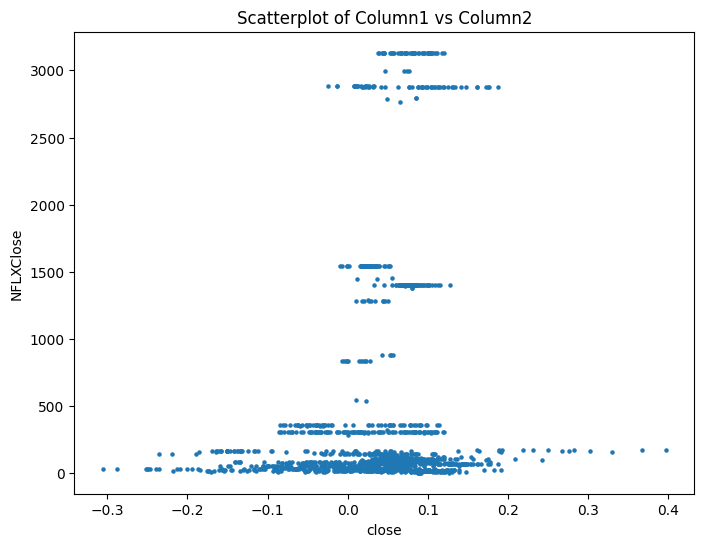

Correlation between NLFX and SPY: 0.18643217943762433

Pct Change Period is 60


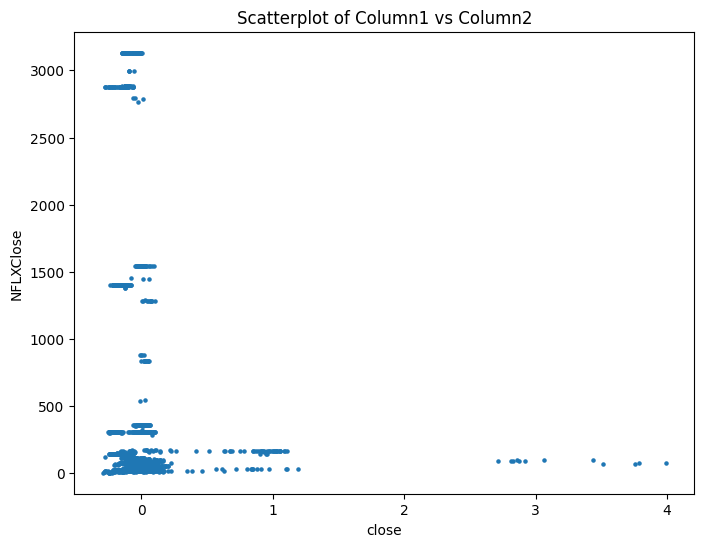

Correlation between NLFX and VXZ: -0.13932475156344978

Pct Change Period is 60


<Figure size 640x480 with 0 Axes>

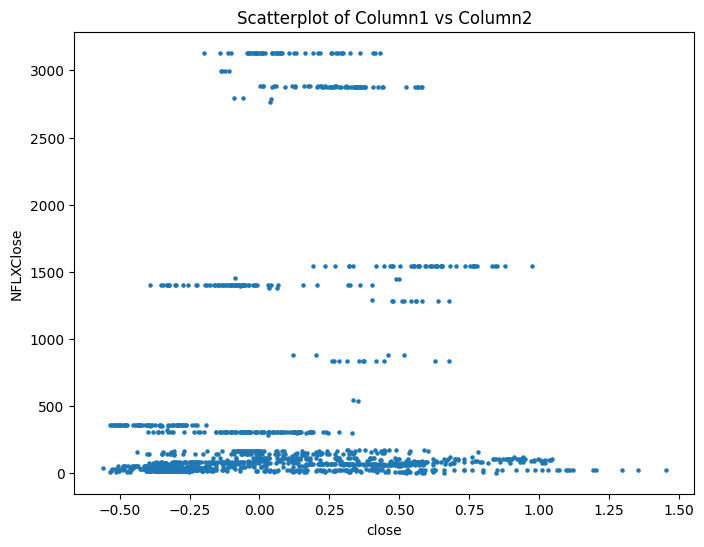

Correlation between NLFX and ROKU: 0.13646460884135825



<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import numpy as np


# Assuming you have 5 DataFrames named df1, df2, df3, df4, and df5
# Store them in a dictionary
dataframes =features_data
dfYvar=pd.DataFrame()
dfYvar=stock_data['NFLX']
display(stock_data['NFLX'] )

# Create scatterplots and correlation matrices

for i in range(5,61,5):
    #for key1, df1 in dctStockDfs.items(0):
    for key1, df1 in dataframes.items():
        #display(df1.columns)
        #display(df2.columns)

        #if key1 != key2:
        dfCorr=pd.concat([df1,dfYvar],join='inner',axis=1)
        #print(dfCorr.dtypes())
        dfCorr=dfCorr.pct_change(i)

########Comment out for close prediction

        window = i  # typical trading month
        dfCorr.iloc[:,1] = dfCorr.iloc[:,1].rolling(window=window).std() * np.sqrt(252)
        #dfCorr.iloc[:,0]=np.log(dfCorr.iloc[:,0])
##############################################################################
        dfCorr.iloc[:,1]=dfCorr.iloc[:,1].shift(-i)
        dfCorr=dfCorr.dropna()
        #display(dfCorr)
        # Create scatterplot
        plt.figure(figsize=(8, 6))
        plt.scatter(dfCorr.iloc[:,0], dfCorr.iloc[:,1], s =5)
        plt.title('Scatterplot of Column1 vs Column2')
        plt.xlabel(dfCorr.columns[0])
        plt.ylabel('NFLXClose')


        # Calculate correlation matrix
        corr = dfCorr.iloc[:,1].corr(dfCorr.iloc[:,0])
        if abs(corr)>=0.1:
            #display(dfCorr)
            print(f'Pct Change Period is {i}')
            plt.show()
            print(f'Correlation between NLFX and {key1}: {corr}\n')
        else:
            plt.close()
            plt.clf()
        del(dfCorr)

In [4]:
'''import requests
import pandas as pd

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NFLX&outputsize=full&apikey={API_KEY}'
response = requests.get(url)
data = response.json()

# Extract time series data
ts_data = data['Time Series (Daily)']

# Convert to DataFrame and transpose so dates are rows
df = pd.DataFrame(ts_data).T

display(df)

# Optionally, rename columns for clarity
df = df.rename(columns={
    '1. open': 'Open',
    '2. high': 'High',
    '3. low': 'Low',
    '4. close': 'Close',
    '5. volume': 'Volume'
})

# Convert index to datetime and columns to numeric
df.index = pd.to_datetime(df.index)
df.index.name = 'date'
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)

print('Final DF')
display(df)'''

"import requests\nimport pandas as pd\n\nurl = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=NFLX&outputsize=full&apikey={API_KEY}'\nresponse = requests.get(url)\ndata = response.json()\n\n# Extract time series data\nts_data = data['Time Series (Daily)']\n\n# Convert to DataFrame and transpose so dates are rows\ndf = pd.DataFrame(ts_data).T\n\ndisplay(df)\n\n# Optionally, rename columns for clarity\ndf = df.rename(columns={\n    '1. open': 'Open',\n    '2. high': 'High',\n    '3. low': 'Low',\n    '4. close': 'Close',\n    '5. volume': 'Volume'\n})\n\n# Convert index to datetime and columns to numeric\ndf.index = pd.to_datetime(df.index)\ndf.index.name = 'date'\ndf[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)\n\nprint('Final DF')\ndisplay(df)"

In [5]:

# Generate descriptive statistics
print(df.describe())

# Explore the data types of each column
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())


          USDclose
count  2516.000000
mean     69.755738
std      35.210131
min      12.450000
25%      39.735000
50%      66.679950
75%      93.152500
max     164.590000
USDclose    float64
dtype: object
USDclose    0
dtype: int64


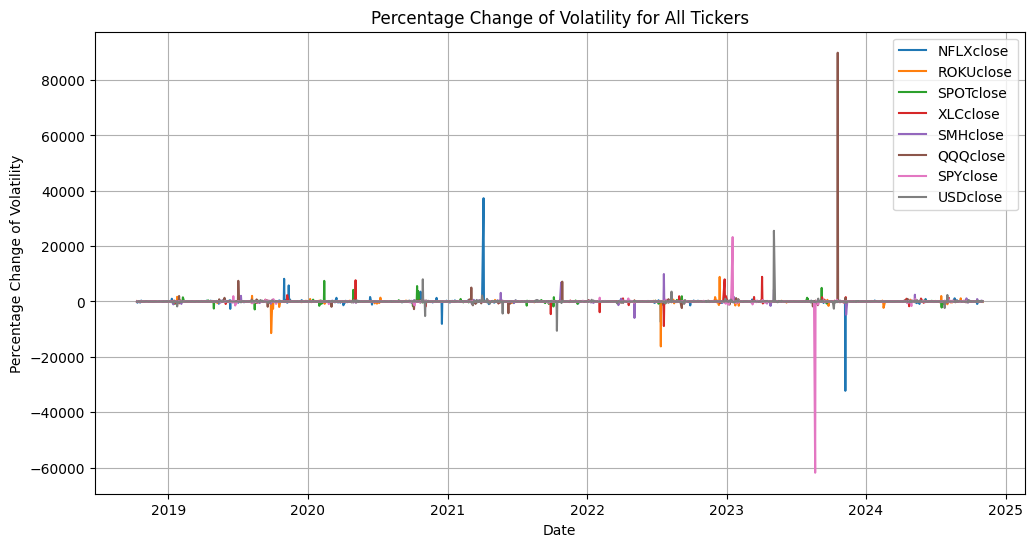

In [6]:

import matplotlib.pyplot as plt

for column in stock_data['NFLX'].columns:
    if column != 'NFLXVolatility':  # Skip the volatility column itself
        stock_data['NFLX'][column + '_pct_change'] = stock_data['NFLX'][column].pct_change() * 100

# Plot the percentage change
plt.figure(figsize=(12, 6))
for column in stock_data['NFLX'].columns:
    if '_pct_change' in column:
      plt.plot(stock_data['NFLX'].index, stock_data['NFLX'][column], label=column.replace('_pct_change', ''))
plt.xlabel('Date')
plt.ylabel('Percentage Change of Volatility')
plt.title('Percentage Change of Volatility for All Tickers')
plt.legend()
plt.grid(True)
plt.show()


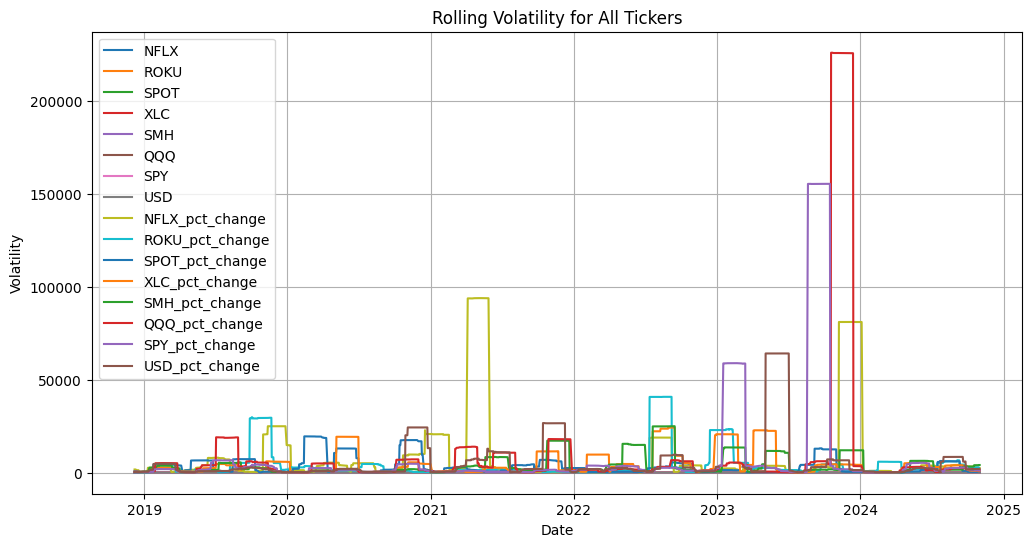

In [7]:
# prompt: calculate rolling volatility from all the tickers using the combine dataframe and generate a plot for all the tickers

import numpy as np
import matplotlib.pyplot as plt

# Assuming 'stock_data' and its structure from the provided code
# Calculate rolling volatility for all tickers
for column in stock_data['NFLX'].columns:
    if column != 'NFLXVolatility' and 'close' in column:
        ticker = column.replace('close', '')
        stock_data['NFLX'][ticker + 'Volatility'] = stock_data['NFLX'][column].rolling(window=40).std() * np.sqrt(252)

# Generate the plot
plt.figure(figsize=(12, 6))
for column in stock_data['NFLX'].columns:
    if 'Volatility' in column:
        plt.plot(stock_data['NFLX'].index, stock_data['NFLX'][column], label=column.replace('Volatility', ''))

plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Rolling Volatility for All Tickers')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
for ticker, df in stock_data.items():
    print(f"\nFirst 5 rows for {ticker}:")
    display(df.head(5))


First 5 rows for NFLX:


,NFLXclose,ROKUclose,SPOTclose,XLCclose,SMHclose,QQQclose,SPYclose,USDclose,NFLXVolatility,NFLXclose_pct_change,...,SPYVolatility,USDVolatility,NFLX_pct_changeVolatility,ROKU_pct_changeVolatility,SPOT_pct_changeVolatility,XLC_pct_changeVolatility,SMH_pct_changeVolatility,QQQ_pct_changeVolatility,SPY_pct_changeVolatility,USD_pct_changeVolatility
2018-10-10,-0.034371,0.011830,-0.228490,-0.076690,-0.087204,-0.053568,-0.019725,-0.155041,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-11,-0.016238,0.028802,-0.199968,-0.071633,-0.080000,-0.053730,-0.034105,-0.158065,NaN,-52.757960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-12,0.053095,0.058896,-0.176076,-0.050573,-0.060334,-0.030586,-0.028550,-0.122008,NaN,-426.985977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-15,0.051613,0.100232,-0.154589,-0.049784,-0.063697,-0.042533,-0.037396,-0.122711,NaN,-2.791296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-16,0.056968,0.116255,-0.116148,-0.026289,-0.030675,-0.013801,-0.018448,-0.060678,NaN,10.374339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



First 5 rows for ROKU:


,ROKUclose
2017-09-28,23.50
2017-09-29,26.54
2017-10-02,23.56
2017-10-03,20.81
2017-10-04,20.85



First 5 rows for SPOT:


,SPOTclose
2018-04-03,149.01
2018-04-04,144.22
2018-04-05,143.99
2018-04-06,147.92
2018-04-09,150.00



First 5 rows for XLC:


,XLCclose
2018-06-19,49.96
2018-06-20,50.58
2018-06-21,50.27
2018-06-22,50.49
2018-06-25,49.45



First 5 rows for SMH:


,SMHclose
2015-01-02,54.49
2015-01-05,53.52
2015-01-06,52.26
2015-01-07,52.94
2015-01-08,54.26



First 5 rows for QQQ:


,QQQclose
2015-01-02,102.94
2015-01-05,101.43
2015-01-06,100.07
2015-01-07,101.36
2015-01-08,103.30



First 5 rows for SPY:


,SPYclose
2015-01-02,205.43
2015-01-05,201.72
2015-01-06,199.82
2015-01-07,202.31
2015-01-08,205.90



First 5 rows for USD:


,USDclose
2015-01-02,94.4600
2015-01-05,91.4900
2015-01-06,87.2700
2015-01-07,88.8400
2015-01-08,94.3445


In [9]:
import matplotlib.pyplot as plt

window_size = 40

for ticker in stock_data:
    df = stock_data[ticker].copy()
    # Check if the 'close' column exists before proceeding
    if 'close' in df.columns:
        # Calculate daily percent change
        df['Pct_Change'] = df['close'].pct_change() * 100

        # Rolling statistics on percent change
        df['Rolling_Mean'] = df['Pct_Change'].rolling(window=window_size).mean()
        df['Rolling_Std'] = df['Pct_Change'].rolling(window=window_size).std()

        # Store back into the dictionary (optional)
        stock_data[ticker] = df

        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(df.index, df['Pct_Change'], label='Daily % Change', alpha=0.6)
        plt.plot(df.index, df['Rolling_Mean'], label=f'{window_size}-Day Rolling Mean', color='red')
        plt.fill_between(df.index, df['Rolling_Mean'] - df['Rolling_Std'],
                        df['Rolling_Mean'] + df['Rolling_Std'], color='orange', alpha=0.3,
                        label=f'{window_size}-Day Rolling Std Dev')
        plt.title(f'Daily % Change with Rolling Stats for {ticker}')
        plt.xlabel('Date')
        plt.ylabel('Percent Change (%)')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"Warning: Ticker {ticker} does not have a 'close' column. Skipping volatility calculation.")

for ticker in stock_data:
    # Calculate percentage change based on closing price for each ticker
    if 'close' in stock_data[ticker].columns:
        stock_data[ticker]['Close_pct_change'] = stock_data[ticker]['close'].pct_change() * 100
    else:
        print(f"Warning: Ticker {ticker} does not have a 'close' column. Skipping percentage change calculation.")

    # Plot the percentage change
    if 'Close_pct_change' in stock_data[ticker].columns:
        plt.figure(figsize=(10, 6))
        plt.plot(stock_data[ticker].index, stock_data[ticker]['Close_pct_change'])
        plt.title(f'Percentage Change of Closing Price - {ticker}')
        plt.xlabel('Date')
        plt.ylabel('Percentage Change (%)')
        plt.grid(True)
        plt.show()
    else:
        print(f"Warning: Ticker {ticker} does not have a 'Close_pct_change' column. Skipping plot.")



# ARIMA Model

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

# Display the DataFrame
display(df)

# Replace infinite or NaN values with finite values before applying adfuller
stock_data['NFLX']['NFLXVolatility'] = stock_data['NFLX']['NFLXVolatility'].replace([np.inf, -np.inf], np.nan).fillna(method='ffill')

# Drop any remaining NaN values after forward fill
stock_data['NFLX'].dropna(inplace=True) # This line is added to drop NaN

# Stationarity Check (Augmented Dickey-Fuller Test)
result = adfuller(stock_data['NFLX']['NFLXVolatility'])
print(f'ADF Statistic: {result[0]:.6f}')
print(f'p-value: {result[1]:.6f}')

# Interpretation of the ADF test result
if result[1] > 0.05:
    print("The series is likely non-stationary. Differencing is recommended.")
else:
    print("The series is stationary.")


,USDclose
2015-01-02,94.4600
2015-01-05,91.4900
2015-01-06,87.2700
2015-01-07,88.8400
2015-01-08,94.3445
...,...
2024-12-24,70.6300
2024-12-26,70.9400
2024-12-27,68.7400
2024-12-30,67.4300


ADF Statistic: -5.430536
p-value: 0.000003
The series is stationary.


<ipython-input-10-75cd1392fb47>:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data['NFLX']['NFLXVolatility'] = stock_data['NFLX']['NFLXVolatility'].replace([np.inf, -np.inf], np.nan).fillna(method='ffill')


The series is stationary.


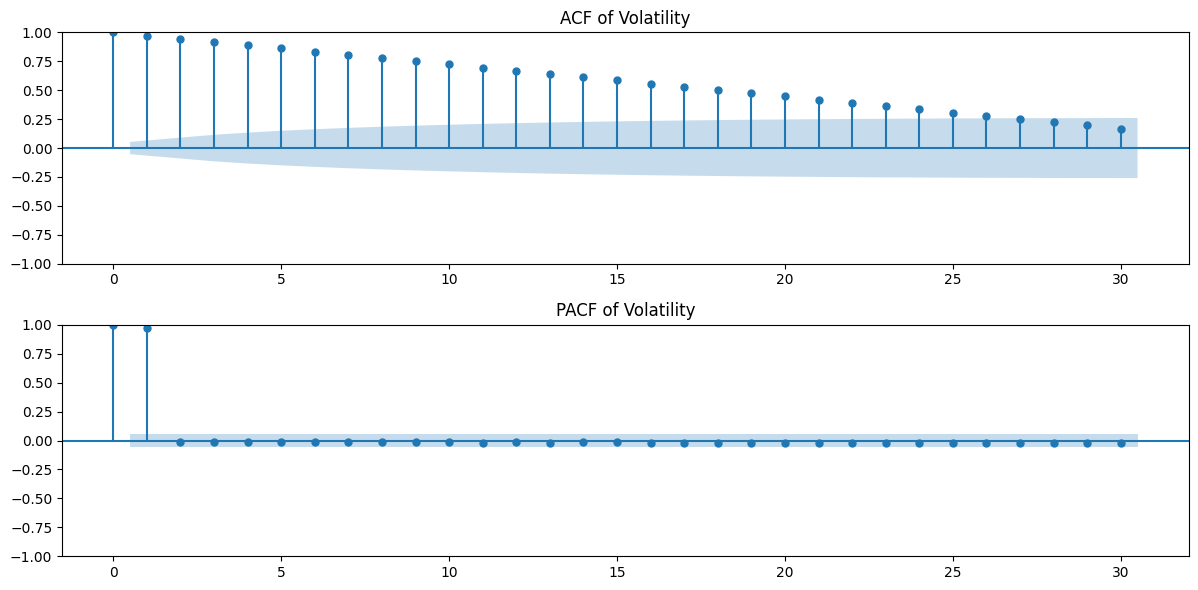

Selected ARIMA order: (1, 0, 0)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

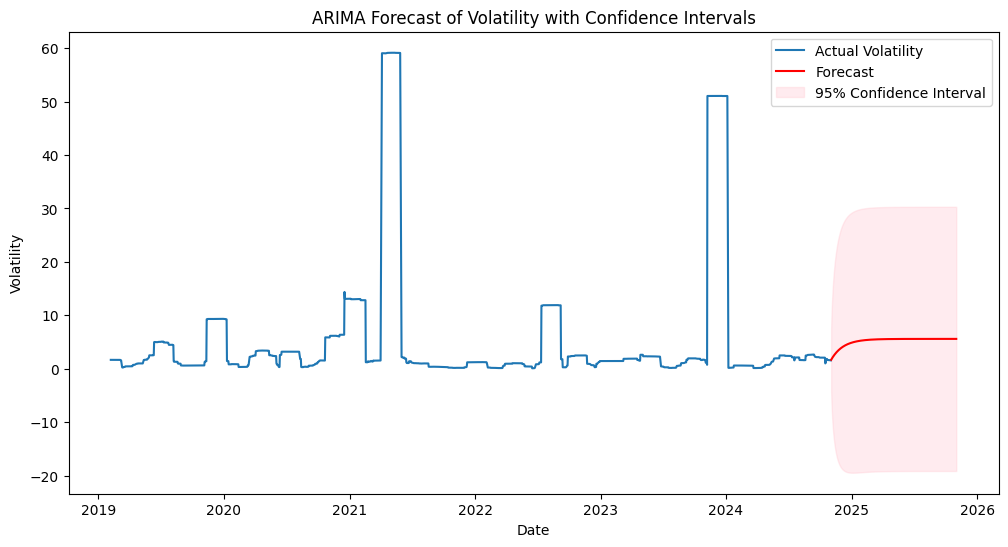

Root Mean Squared Error (RMSE): 2.98
                               SARIMAX Results                                
Dep. Variable:             volatility   No. Observations:                 1366
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3429.368
Date:                Sun, 25 May 2025   AIC                           6864.736
Time:                        21:35:44   BIC                           6880.395
Sample:                             0   HQIC                          6870.597
                               - 1366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6004     10.680      0.524      0.600     -15.332      26.533
ar.L1          0.9717      0.013     74.559      0.000       0.946       0.997
sigma2         

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import math


# Use the combined DataFrame containing 'NFLXVolatility'
df = stock_data['NFLX'].copy()

# Calculate volatility if it doesn't exist (This part likely needs adjustment)
if 'volatility' not in df.columns:
    # Calculate percent change for the 'Close' prices based on the 'NFLXclose' column
    df['Close_pct_change'] = df['NFLXclose'].pct_change()
    # Calculate rolling volatility using a 40-day window
    df['volatility'] = df['Close_pct_change'].rolling(window=40).std()
    # Drop rows with NaN values created by the calculations
    df.dropna(inplace=True)

# ... (rest of the code remains the same)

# Interpretation of the ADF test
if result[1] > 0.05:
    print("The series is likely non-stationary. Differencing is recommended.")
else:
    print("The series is stationary.")

# ACF and PACF Plots (to determine p and q)
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df['volatility'], lags=30, ax=plt.gca())  # Use volatility for ACF
plt.title('ACF of Volatility')
plt.subplot(212)
plot_pacf(df['volatility'], lags=30, ax=plt.gca())  # Use volatility for PACF
plt.title('PACF of Volatility')
plt.tight_layout()
plt.show()

# Selected ARIMA order
p, d, q = 1, 0, 0
print(f"Selected ARIMA order: ({p}, {d}, {q})")

# ARIMA Model
model = ARIMA(df['volatility'], order=(p, d, q))  # Fit ARIMA on volatility
model_fit = model.fit()

# Make Predictions
forecast_steps = 365
predictions = model_fit.get_forecast(steps=forecast_steps)
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['volatility'], label='Actual Volatility')  # Plot actual volatility

future_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
plt.plot(future_index, predicted_mean, label='Forecast', color='red')

plt.fill_between(future_index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1],
                 color='pink', alpha=.3, label='95% Confidence Interval')

plt.title('ARIMA Forecast of Volatility with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Model Evaluation (example: RMSE)
in_sample_predictions = model_fit.predict()
rmse = math.sqrt(mean_squared_error(df['volatility'][in_sample_predictions.index], in_sample_predictions))  # Comparing actual values with in-sample predictions
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Print model summary
print(model_fit.summary())

# GARCH

[1.         0.99211317 0.97749121 0.95753747 0.93335543 0.90595758
 0.87638337 0.84549377 0.8138511  0.78181047 0.74992079 0.71846987
 0.68787222 0.65847105 0.63028709 0.6037257  0.57897801 0.5563551
 0.53583747 0.51735604 0.50061637]


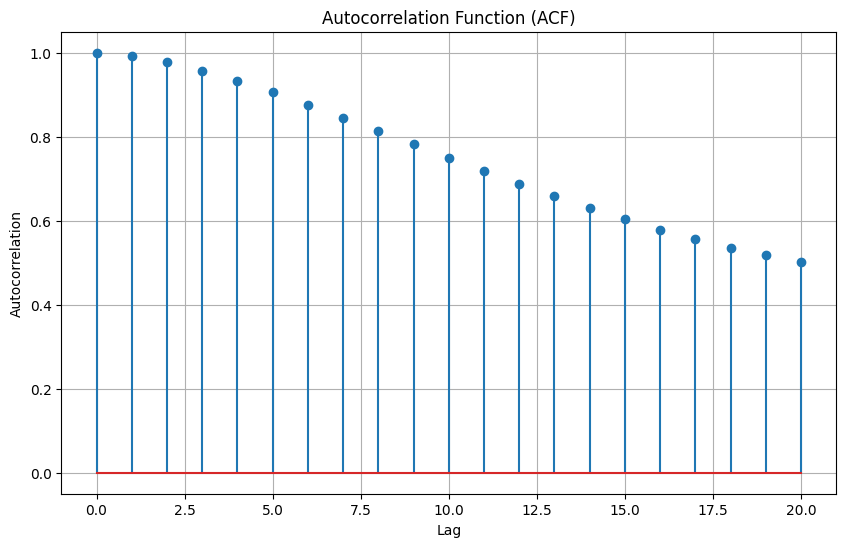

In [12]:

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

autocorrelations = acf(df['NFLXVolatility'], nlags=20)

# Print or plot the autocorrelation values
print(autocorrelations)

plt.figure(figsize=(10, 6))
plt.stem(range(len(autocorrelations)), autocorrelations)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(True)
plt.show()


In [13]:
"""
#!pip install arch
import matplotlib.pyplot as plt
from arch import arch_model

for ticker in stock_data:
    # Prepare the data for GARCH modeling (use percentage changes)
    returns = stock_data[ticker]['NFLX_pct_change'].dropna()

    # Create and fit the GARCH(1,1) model
    model = arch_model(returns, vol='GARCH', p=1, q=1)
    model_fit = model.fit(update_freq=5)

    # Print model summary
    print(f"\nGARCH Model Summary for {ticker}:")
    print(model_fit.summary())

    forecast = model_fit.forecast(horizon=90)  # Forecast 90 days ahead

    plt.figure(figsize=(10, 6))
    plt.plot(forecast.variance.values[-1, :], label='Forecasted Volatility')
    plt.title(f'GARCH(1,1) Forecasted Volatility - {ticker}')
    plt.xlabel('Days Ahead')
    plt.ylabel('Variance')
    plt.legend()
    plt.show()


SyntaxError: incomplete input (<ipython-input-13-3ff0ecf257ee>, line 1)

# LSTM Model

In [ ]:
# prompt: generate an LSTM Model for all the tickers from the data above

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming 'stock_data' is your DataFrame with all ticker data
# and 'NFLXVolatility' is the target variable

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Prepare data for LSTM
def prepare_data(data, lookback=40): # Adjust lookback as needed
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values)

    X, y = [], []
    for i in range(lookback, len(scaled_data)):
        X.append(scaled_data[i - lookback:i, :])
        y.append(scaled_data[i, 0])  # Assuming first column is target

    return np.array(X), np.array(y), scaler

# Loop through tickers and train/evaluate models
for ticker in stock_data['NFLX'].columns:
    if 'Volatility' in ticker:  # Train only on volatility columns
        print(f"Training LSTM for {ticker}...")

        # Prepare data
        df_ticker = stock_data['NFLX'][[ticker]]  #Select only the current ticker
        X, y, scaler = prepare_data(df_ticker)

        # Split data (adjust train/test split as needed)
        train_size = int(len(X) * 0.8)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]

        # Create and train LSTM model
        input_shape = (X_train.shape[1], X_train.shape[2])
        model = create_lstm_model(input_shape)
        model.fit(X_train, y_train, epochs=10, batch_size=32) # Adjust epochs and batch_size

        # Evaluation (example: loss)
        loss = model.evaluate(X_test, y_test, verbose=0)
        print(f"LSTM Loss for {ticker}: {loss}")

        # (Optional) Make predictions and inverse transform for visualization
        # y_pred = model.predict(X_test)
        # y_pred = scaler.inverse_transform(np.concatenate((y_pred, X_test[:,-1,1:]), axis=1))[:,0]
        # y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1,1),X_test[:,-1,1:]),axis=1))[:,0]
        # plt.plot(y_test, label='True')
        # plt.plot(y_pred, label='Predicted')
        # plt.legend()
        # plt.title(f'{ticker} Prediction')
        # plt.show()


# Random Forest Model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Prepare the data for Random Forest
all_data = []
tickers = []

for ticker, df in stock_data.items():
    # Check if the 'close' column exists, if not try to find a column ending in 'close'
    close_column = 'close'
    if close_column not in df.columns:
        close_column = next((col for col in df.columns if col.endswith('close')), None)
        if close_column is None:
            print(f"Warning: Ticker {ticker} does not have a 'close' column. Skipping.")
            continue

    # Calculate percent change for the 'Close' prices
    df['Close_pct_change'] = df[close_column].pct_change()

    # Calculate rolling volatility using a 40-day window
    df['volatility'] = df['Close_pct_change'].rolling(window=40).std()

    # Drop rows with NaN values created by the calculations
    df.dropna(inplace=True)

    # Features (example: using previous day's closing price)
    X = df[['Close_pct_change']]  # Using percent change as a feature
    y = df['volatility']  # Change target variable to volatility
    all_data.append((X, y))
    tickers.append(ticker)

# Train a Random Forest model for each ticker
for i, ticker in enumerate(tickers):
    X, y = all_data[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Plot actual vs. predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Actual Volatility')
    plt.plot(y_test.index, y_pred, label='Predicted Volatility', linestyle='--')
    plt.title(f'Random Forest Predictions for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

for i, ticker in enumerate(tickers):
    X, y = all_data[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Convert predictions and true values to binary classification (e.g., price increase/decrease)
    y_pred_binary = (y_pred > y_test.shift(1)).astype(int)  # Comparing with the previous day's price
    y_test_binary = (y_test > y_test.shift(1)).astype(int)


    # Calculate metrics
    accuracy = accuracy_score(y_test_binary[1:], y_pred_binary[1:])
    precision = precision_score(y_test_binary[1:], y_pred_binary[1:])
    recall = recall_score(y_test_binary[1:], y_pred_binary[1:])
    f1 = f1_score(y_test_binary[1:], y_pred_binary[1:])


    # AUC-ROC (if you can define probabilities - adapt for your model)
    try:
        # Example probability calculation (replace with your actual probabilities from the model)
        y_prob = model.predict_proba(X_test)[:, 1] # Assuming probability of positive class
        auc_roc = roc_auc_score(y_test_binary[1:], y_prob[1:])
        fpr, tpr, thresholds = roc_curve(y_test_binary[1:], y_prob[1:])

        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'AUC-ROC Curve for {ticker}')
        plt.legend()
        plt.show()
    except AttributeError as e:
        print(f"Error calculating AUC-ROC for {ticker}: {e}")
        print("Check if your model has a predict_proba method.")
        auc_roc = 'N/A'


    print(f"Metrics for {ticker}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"AUC-ROC: {auc_roc}")  # Print AUC-ROC



In [ ]:

#RMSE for Tickers for the Random Forest Models
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

rmse_values = {}

for i, ticker in enumerate(tickers):
    X, y = all_data[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values[ticker] = rmse
    print(f"RMSE for {ticker}: {rmse}")




# XGBoost Model

In [ ]:
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Prepare the data for XGBoost
all_data = []
tickers = []

for ticker, df in stock_data.items():
    # Check if a column ending with 'close' exists
    close_column = next((col for col in df.columns if col.endswith('close')), None)

    # If no 'close' column found, skip this ticker
    if close_column is None:
        print(f"Warning: Ticker {ticker} does not have a 'close' column. Skipping.")
        continue

    # Calculate percent change for the closing price
    df['Close_pct_change'] = df[close_column].pct_change()

    # Calculate rolling volatility using a 40-day window
    df['volatility'] = df['Close_pct_change'].rolling(window=40).std()

    # Drop rows with NaN values created by the calculations
    df.dropna(inplace=True)

    # Features (example: using previous day's closing price)
    X = df[['Close_pct_change']]  # Using percent change as a feature
    y = df['volatility']  # Change target variable to volatility
    all_data.append((X, y))
    tickers.append(ticker)

# Train an XGBoost model for each ticker
for i, ticker in enumerate(tickers):
    X, y = all_data[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Plot actual vs. predicted
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Actual Volatility')
    plt.plot(y_test.index, y_pred, label='Predicted Volatility', linestyle='--')
    plt.title(f'XGBoost Predictions for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:

import numpy as np
rmse_values_xgboost = {}

for i, ticker in enumerate(tickers):
    X, y = all_data[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values_xgboost[ticker] = rmse
    print(f"XGBoost RMSE for {ticker}: {rmse}")


In [ ]:

import numpy as np
from sklearn.model_selection import KFold

n_splits = 5

for i, ticker in enumerate(tickers):
    X, y = all_data[i]
    kf = KFold(n_splits=n_splits, shuffle=False) # Shuffle=False to maintain time order
    rmse_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)

    print(f"\n{ticker}:")
    print(f"RMSE scores for each fold: {rmse_scores}")
    print(f"Average RMSE: {np.mean(rmse_scores)}")
    print(f"Standard Deviation of RMSE: {np.std(rmse_scores)}")


In [ ]:

from sklearn.metrics import r2_score

r_squared_values = {}

for i, ticker in enumerate(tickers):
    X, y = all_data[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    r_squared_values[ticker] = r_squared
    print(f"R-squared for {ticker}: {r_squared}")
